We see that our dataset is mad of $n=62$ and $p=14$. These are its main features.
Let' also consider the subset and display the first 3 rows.


In [315]:
 load("movie.RData")
ls()
names(movie)
 mydata<-movie
mydata<-mydata[,c("box","budget", "action", "cmngsoon")]

# verifica correttezza subset:
mydata[1:3,]

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
taking <- rep(1, length(mydata$budget))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
taking [mydata$box<20000000]=0
## create the dataset we need


#if you want to add a new variable into a mydata
mydata<-data.frame(taking=taking ,mydata[,c("budget", "action", "cmngsoon")])
mydata[1:3,]

mydata$action<-as.factor(mydata$action)
mydata$taking<-as.factor(mydata$taking)

[1] "X"                  "best.lambda"        "cv.lasso"          
 [4] "cv.ridge"           "est.probs"          "est.values"        
 [7] "id.zero"            "m.gam"              "m.gam2"            
[10] "m.gam3"             "m.lasso"            "m.lasso.min"       
[13] "m.pcr"              "m.ridge"            "m.ridge.min"       
[16] "model.mydata"       "model.mydata.lda"   "model.mydata.qda"  
[19] "model.mydata.train" "model.mydata2"      "model.mydata3"     
[22] "model.mydata4"      "movie"              "mse"               
[25] "mydata"             "n"                  "nonzero"           
[28] "p"                  "preds"              "preds.lda"         
[31] "preds.lda1"         "preds.qda"          "preds.qda1"        
[34] "preds.test"         "probs.test"         "selection"         
[37] "sum"                "taking"             "test.set"          
[40] "training.set"       "values.roc"         "values.roc1"       
[43] "values.roc2"        "values.roc3"        "x1.cv"             
[46] "x2"                 "x2.cv"              "y"                 
[49] "y2"

[1] "box"       "mprating"  "budget"    "starpower" "sequel"    "action"   
 [7] "comedy"    "animated"  "horror"    "addict"    "cmngsoon"  "fandango" 
[13] "cntwait"

box,budget,action,cmngsoon
19167085,28.0,FALSE,10
63106589,150.0,FALSE,59
5401605,37.4,FALSE,24


[1] 62  4

taking,budget,action,cmngsoon
0,28.0,FALSE,10
1,150.0,FALSE,59
0,37.4,FALSE,24


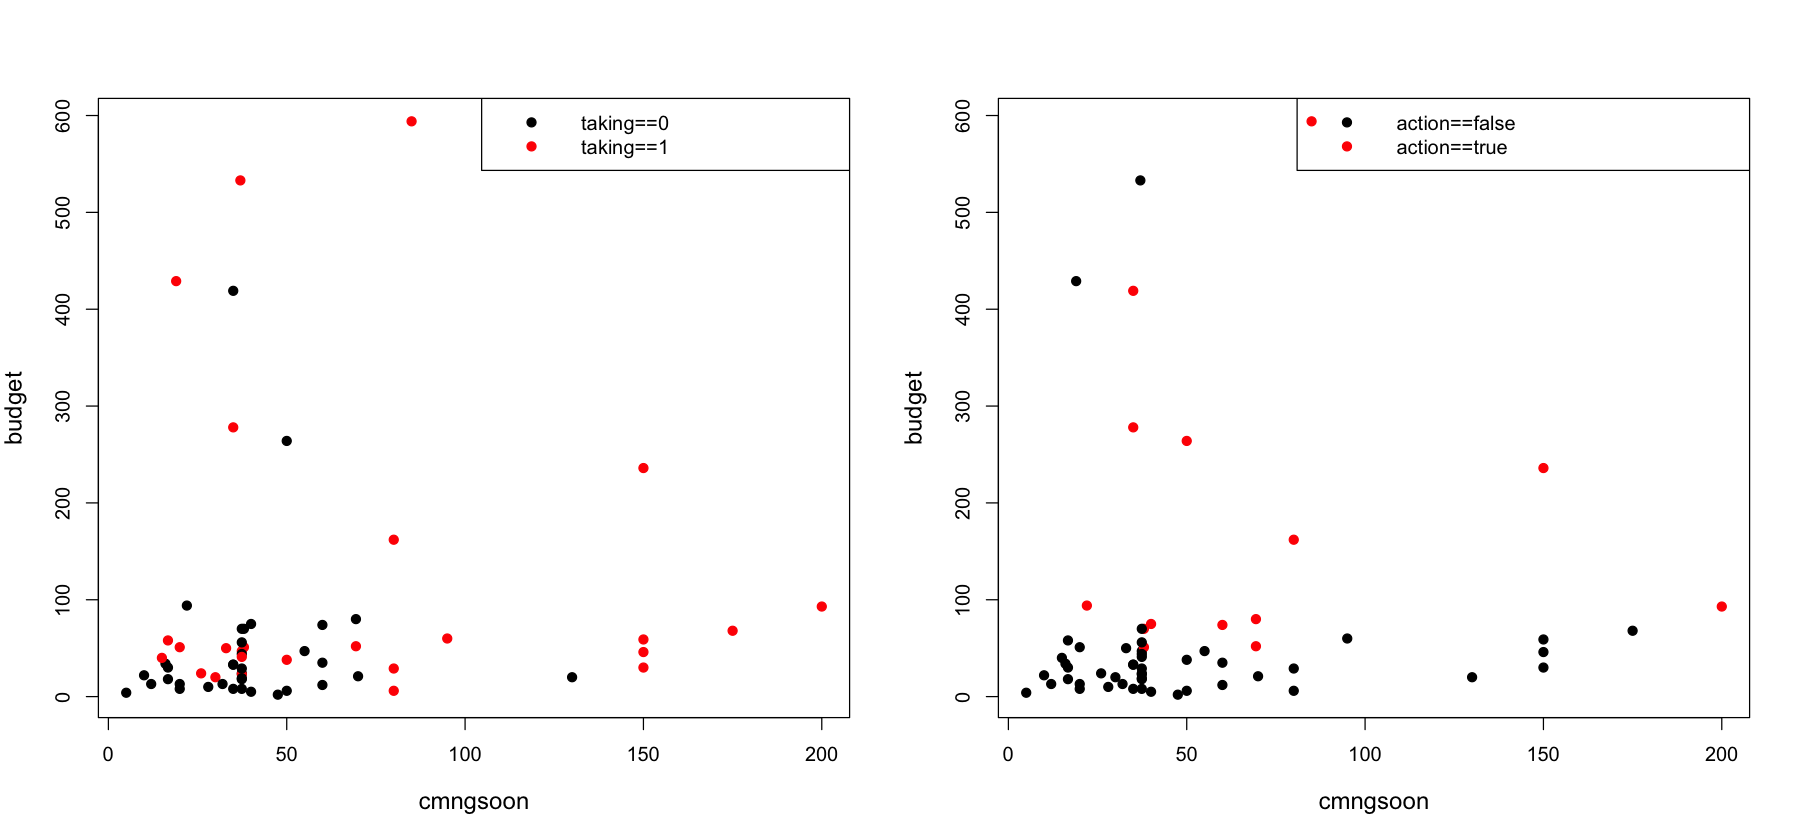

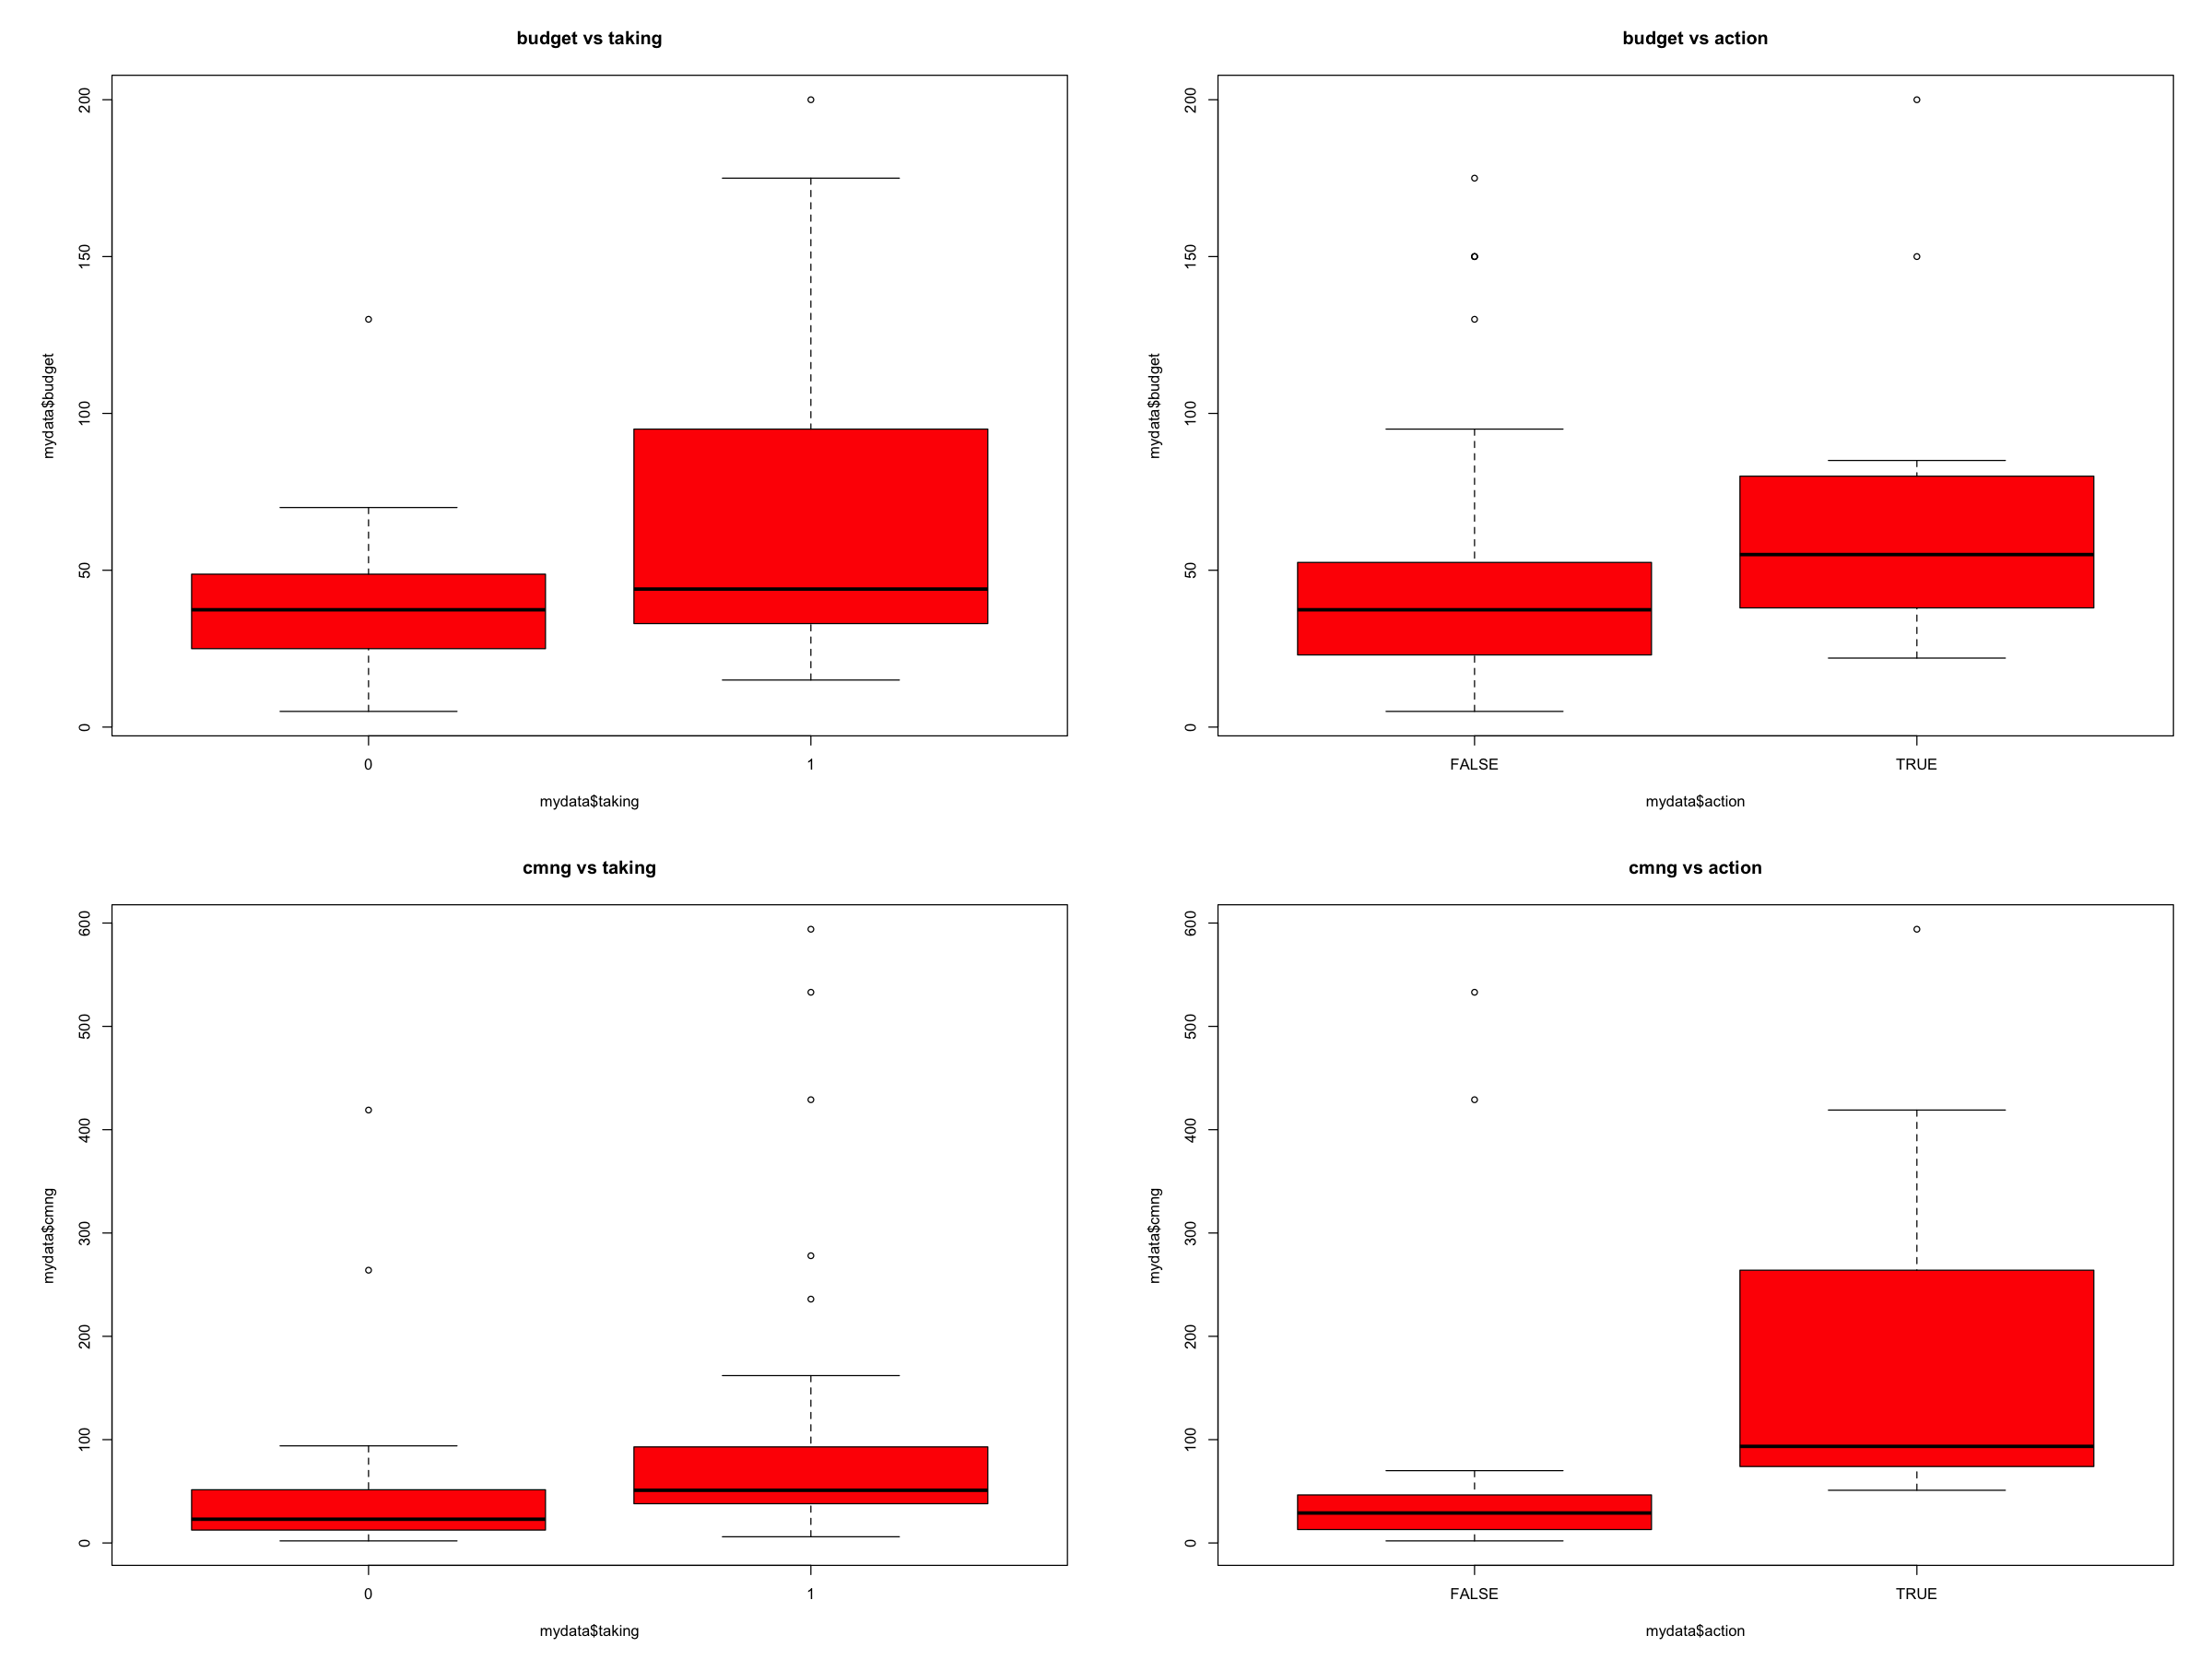

In [316]:
#plot boxplot diverse variabili :

## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)

plot(mydata$budget, mydata$cmngsoon, cex.lab=1.2,pch=19, xlab='cmngsoon', ylab='budget',col=mydata$taking)
legend("topright", col=c(1,2), pch=c(19,19),
        legend=c('taking==0','taking==1'))


plot(mydata$budget, mydata$cmngsoon, cex.lab=1.2,pch=19,  xlab='cmngsoon', ylab='budget',col=mydata$action)
legend("topright", col=c(1,2), pch=c(19,19),
        legend=c('action==false','action==true'))
options(repr.plot.width = 20, repr.plot.height = 15)
    par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(2,2))

#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$budget ~mydata$taking, main="budget vs taking",  col="red")

#plot variabile X contro la seconda variabile dichotomica
 boxplot(mydata$budget~ mydata$action, main="budget vs action", col="red")

#plot variabile X contro la seconda variabile dichotomica
 boxplot(mydata$cmng~ mydata$taking, col="red", main="cmng vs taking")

 boxplot(mydata$cmng~ mydata$action, main="cmng vs action", col="red")


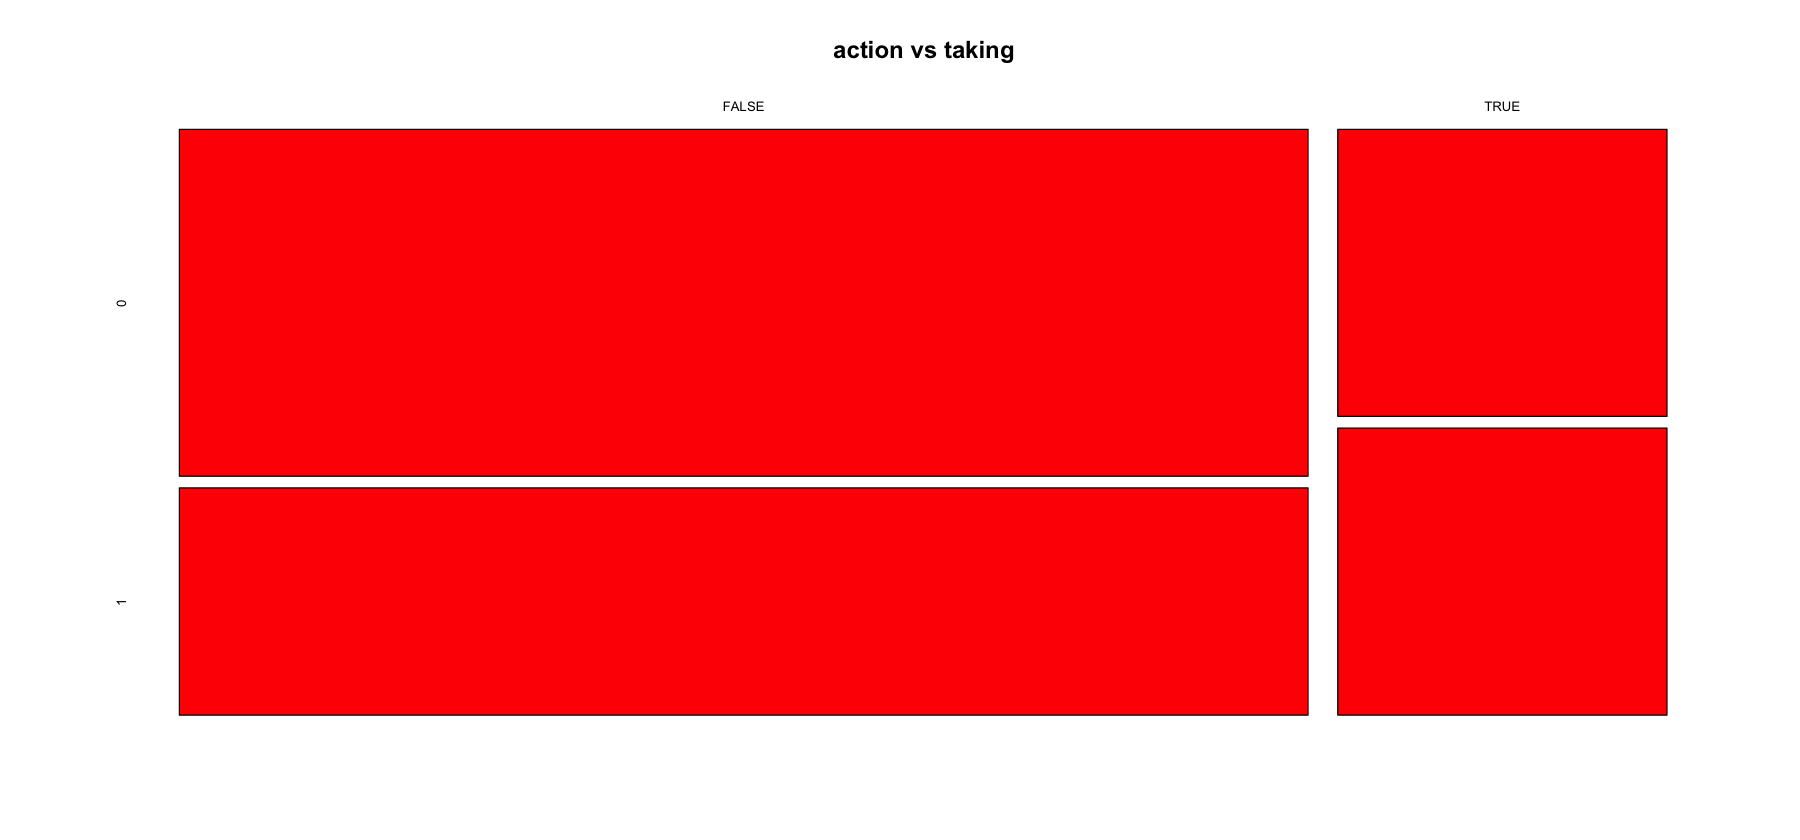

In [317]:
options(repr.plot.width = 15, repr.plot.height = 7)
mosaicplot(table(mydata$action, mydata$taking), main='action vs taking',col="red")
##COMMENTARE RISULTATI

In the first scatterplot of budget vs cmng with taking we see a partial overlapping between variables meaning that probabbly there would not be interactions.
In the second scatterplot of budget vs cmng with action we can somehow distinguish between the points, meaning that probably we will have intaractions.


In the boxplots we see:
- first boxplot: with taking=1 a bit higher budget (but with larger whiskers), boxplot with larger width. In both boxplots we see outliers
- second boxplot: with action=TRUE a bit higher budget, boxplot with larger width, and smaller whiskers. In both boxplots we see outliers
- third boxplot: with taking=1 a bit higher cmngsoon (but with large whiskers), boxplot with larger width, and smaller whiskers. In both boxplots we see outliers.
- second boxplot: with action=TRUE a bit higher cmng, boxplot with very larger width, and larger whiskers. In both boxplots we see outliers

The boxplots maybe suggest interactions but we have to check it.

We also see a mosaic plot of action vs taking.


### LOGISTIC REGRESSION MODEL

In [318]:
# regression fit with all covariates and interactions of them
 model.mydata<- glm( taking ~ budget*action+budget*cmngsoon+cmngsoon*action, data=mydata, family=binomial)

# result of the regression fit
 summary (model.mydata)

model.mydata2 <- update(model.mydata, .~.-budget:cmngsoon)
 summary (model.mydata2)

model.mydata3 <- update(model.mydata2, .~.-budget:action)
 summary (model.mydata3)


Call:
glm(formula = taking ~ budget * action + budget * cmngsoon + 
    cmngsoon * action, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7958  -0.7683  -0.4859   0.7970   1.8299  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)         -2.9976742  1.0161559  -2.950  0.00318 **
budget               0.0151411  0.0137673   1.100  0.27143   
actionTRUE           0.8136114  2.8928734   0.281  0.77852   
cmngsoon             0.0507821  0.0247665   2.050  0.04032 * 
budget:actionTRUE    0.0139215  0.0473394   0.294  0.76870   
budget:cmngsoon      0.0001018  0.0002470   0.412  0.68009   
actionTRUE:cmngsoon -0.0542539  0.0229259  -2.366  0.01796 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.330  on 61  degrees of freedom
Residual deviance: 59.951  on 55  degrees of freedom
AIC: 73.951

Numb


Call:
glm(formula = taking ~ budget + action + cmngsoon + budget:action + 
    action:cmngsoon, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8079  -0.7460  -0.4793   0.7823   1.8394  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.15107    0.94342  -3.340 0.000838 ***
budget               0.01853    0.01097   1.689 0.091164 .  
actionTRUE          -0.08556    2.27558  -0.038 0.970009    
cmngsoon             0.05536    0.02216   2.498 0.012483 *  
budget:actionTRUE    0.02947    0.03551   0.830 0.406584    
actionTRUE:cmngsoon -0.05325    0.02261  -2.356 0.018493 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.33  on 61  degrees of freedom
Residual deviance: 60.16  on 56  degrees of freedom
AIC: 72.16

Number of Fisher Scoring iterations: 6



Call:
glm(formula = taking ~ budget + action + cmngsoon + action:cmngsoon, 
    family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7959  -0.8091  -0.4645   0.9483   1.8754  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.38697    0.94935  -3.568  0.00036 ***
budget               0.02344    0.01026   2.284  0.02240 *  
actionTRUE           1.46548    1.22519   1.196  0.23165    
cmngsoon             0.05572    0.02259   2.467  0.01363 *  
actionTRUE:cmngsoon -0.05346    0.02294  -2.331  0.01976 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.330  on 61  degrees of freedom
Residual deviance: 61.078  on 57  degrees of freedom
AIC: 71.078

Number of Fisher Scoring iterations: 6


We start with a model with all covariates and all interactions, and we and with the following model using model selection. The selection was made based on P-value. There are some covariates for which the p-value is very high (action) for example, but for hierarcy principle we cannot remove them. In table there is also the comparison between initial and final model using anova and 'Chisq' test.

In [319]:
anova( model.mydata, model.mydata3,test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
55,59.95144,NA,NA,NA
57,61.07786,-2,-1.126423,0.5693776


Let's try with smooth splines. Seed=111

In [320]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$budget, y=mydata$taking, cv=TRUE)
x1.cv 
x2.cv = smooth.spline(x= mydata$cmng, y=mydata$taking, cv=TRUE)
x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(taking ~ s(budget,2) + action+ s(cmngsoon,4) +  action:s(cmngsoon,4),family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Call:
smooth.spline(x = mydata$budget, y = mydata$taking, cv = TRUE)

Smoothing Parameter  spar= 1.499934  lambda= 66.25605 (27 iterations)
Equivalent Degrees of Freedom (Df): 2.00126
Penalized Criterion (RSS): 6.787211
PRESS(l.o.o. CV): 0.2163171

Call:
smooth.spline(x = mydata$cmng, y = mydata$taking, cv = TRUE)

Smoothing Parameter  spar= 1.175555  lambda= 0.007240901 (15 iterations)
Equivalent Degrees of Freedom (Df): 3.717388
Penalized Criterion (RSS): 9.830166
PRESS(l.o.o. CV): 0.2317882


Call: gam(formula = taking ~ s(budget, 2) + action + s(cmngsoon, 4) + 
    action:s(cmngsoon, 4), family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.6911 -0.7895 -0.4627  0.8817  1.8515 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 84.3303 on 61 degrees of freedom
Residual Deviance: 56.7288 on 52.9998 degrees of freedom
AIC: 74.7292 

Number of Local Scoring Iterations: 11 

Anova for Parametric Effects
                      Df Sum Sq Mean Sq F value  Pr(>F)   
s(budget, 2)           1  4.277  4.2768  4.7478 0.03380 * 
action                 1  0.580  0.5802  0.6441 0.42580   
s(cmngsoon, 4)         1  0.191  0.1910  0.2121 0.64704   
action:s(cmngsoon, 4)  1 10.129 10.1294 11.2450 0.00148 **
Residuals             53 47.742  0.9008                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                      Npar Df Npar Chisq P(Chi)
(Interce

In [321]:
## primo fit considerando le variabili splines smooth
m.gam2 <- gam(taking ~ s(budget,2) + action+ cmngsoon +  action:cmngsoon,family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam2)


Call: gam(formula = taking ~ s(budget, 2) + action + cmngsoon + action:cmngsoon, 
    family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.7553 -0.8195 -0.4690  0.9119  1.8660 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 84.3303 on 61 degrees of freedom
Residual Deviance: 59.9564 on 56 degrees of freedom
AIC: 71.9563 

Number of Local Scoring Iterations: 9 

Anova for Parametric Effects
                Df Sum Sq Mean Sq F value  Pr(>F)  
s(budget, 2)     1  4.395  4.3949  4.7893 0.03282 *
action           1  0.060  0.0604  0.0658 0.79850  
cmngsoon         1  0.927  0.9269  1.0101 0.31920  
action:cmngsoon  1  5.390  5.3902  5.8740 0.01862 *
Residuals       56 51.388  0.9176                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                Npar Df Npar Chisq P(Chi)
(Intercept)                              
s(budget, 2)          1     1.11

In [322]:
## primo fit considerando le variabili splines smooth
m.gam3 <- gam(taking ~  budget + action+ s(cmngsoon,4) +  action:s(cmngsoon,4),family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam3)


Call: gam(formula = taking ~ budget + action + s(cmngsoon, 4) + action:s(cmngsoon, 
    4), family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.7343 -0.7681 -0.4569  0.9011  1.8654 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 84.3303 on 61 degrees of freedom
Residual Deviance: 57.9305 on 53.9998 degrees of freedom
AIC: 73.9309 

Number of Local Scoring Iterations: 10 

Anova for Parametric Effects
                      Df Sum Sq Mean Sq F value   Pr(>F)   
budget                 1  5.112  5.1118  5.6105 0.021461 * 
action                 1  0.383  0.3829  0.4203 0.519552   
s(cmngsoon, 4)         1  0.248  0.2480  0.2722 0.603980   
action:s(cmngsoon, 4)  1  9.769  9.7687 10.7216 0.001851 **
Residuals             54 49.200  0.9111                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                      Npar Df Npar Chisq P(Chi)
(Interce

From smooth splines outputs it is clear that we don't need them.
In fact Based  AIC for model without splines is lower.
We can see it also from training error rate that is equal to 24% 

- training error rate is: 15/62
- sensitivity is: 15/26
- specitivity is: 32/36

In [323]:

#estimate values
est.values<-predict(model.mydata3)
#est.values

#estimate probability
est.probs<-predict(model.mydata3,type="response")
#est.probs

preds<-rep(0,nrow(mydata))
preds[est.probs>0.5]<-1
addmargins(table(preds,taking=mydata$taking))

,0,1,Sum
0,32,11,43
1,4,15,19
Sum,36,26,62


Let's now select a training set consider 60% of data and test set with 40% and evaluate the model we obtained. The seed is set to 222.

In [324]:
n<-nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)


#training and test

training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]

## fit the model with the training set

model.mydata.train <- glm(taking ~ budget + action+ cmngsoon +  action:cmngsoon, data=training.set, family="binomial")
summary(model.mydata.train)


Call:
glm(formula = taking ~ budget + action + cmngsoon + action:cmngsoon, 
    family = "binomial", data = training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5432  -0.8633  -0.3406   0.3902   2.0804  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)         -4.29715    1.60139  -2.683  0.00729 **
budget               0.02274    0.01242   1.832  0.06698 . 
actionTRUE           2.12154    1.75668   1.208  0.22716   
cmngsoon             0.06107    0.03244   1.883  0.05973 . 
actionTRUE:cmngsoon -0.05931    0.03270  -1.814  0.06974 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.973  on 36  degrees of freedom
Residual deviance: 32.448  on 32  degrees of freedom
AIC: 42.448

Number of Fisher Scoring iterations: 7


In [325]:
### prediction based on test set

probs.test <- predict(model.mydata.train, newdata=test.set, type='response')
preds.test <- rep(0, length(probs.test))
preds.test[probs.test>0.5] <- 1

Let's check the test error rate, sensitivity and specitivity.

In [326]:
addmargins(table(preds.test, taking=test.set$taking))


,0,1,Sum
0,12,9,21
1,0,4,4
Sum,12,13,25


- test error rate is: 9/25
- sensitivity is: 4/13
- specitivity is: 1

So usign best model obtain in the total dataset and evaluate it in a training set and test set, leads to an error on the test set equal too  36%, which is a bit high but acceptable.

Let's have a look into ROC curve in order to understand the goodness of our classifier.
We can see that the AUC value is 0.84
We know that as much closer AUC is to 1 much the model is good, so in this case is satisfactory.

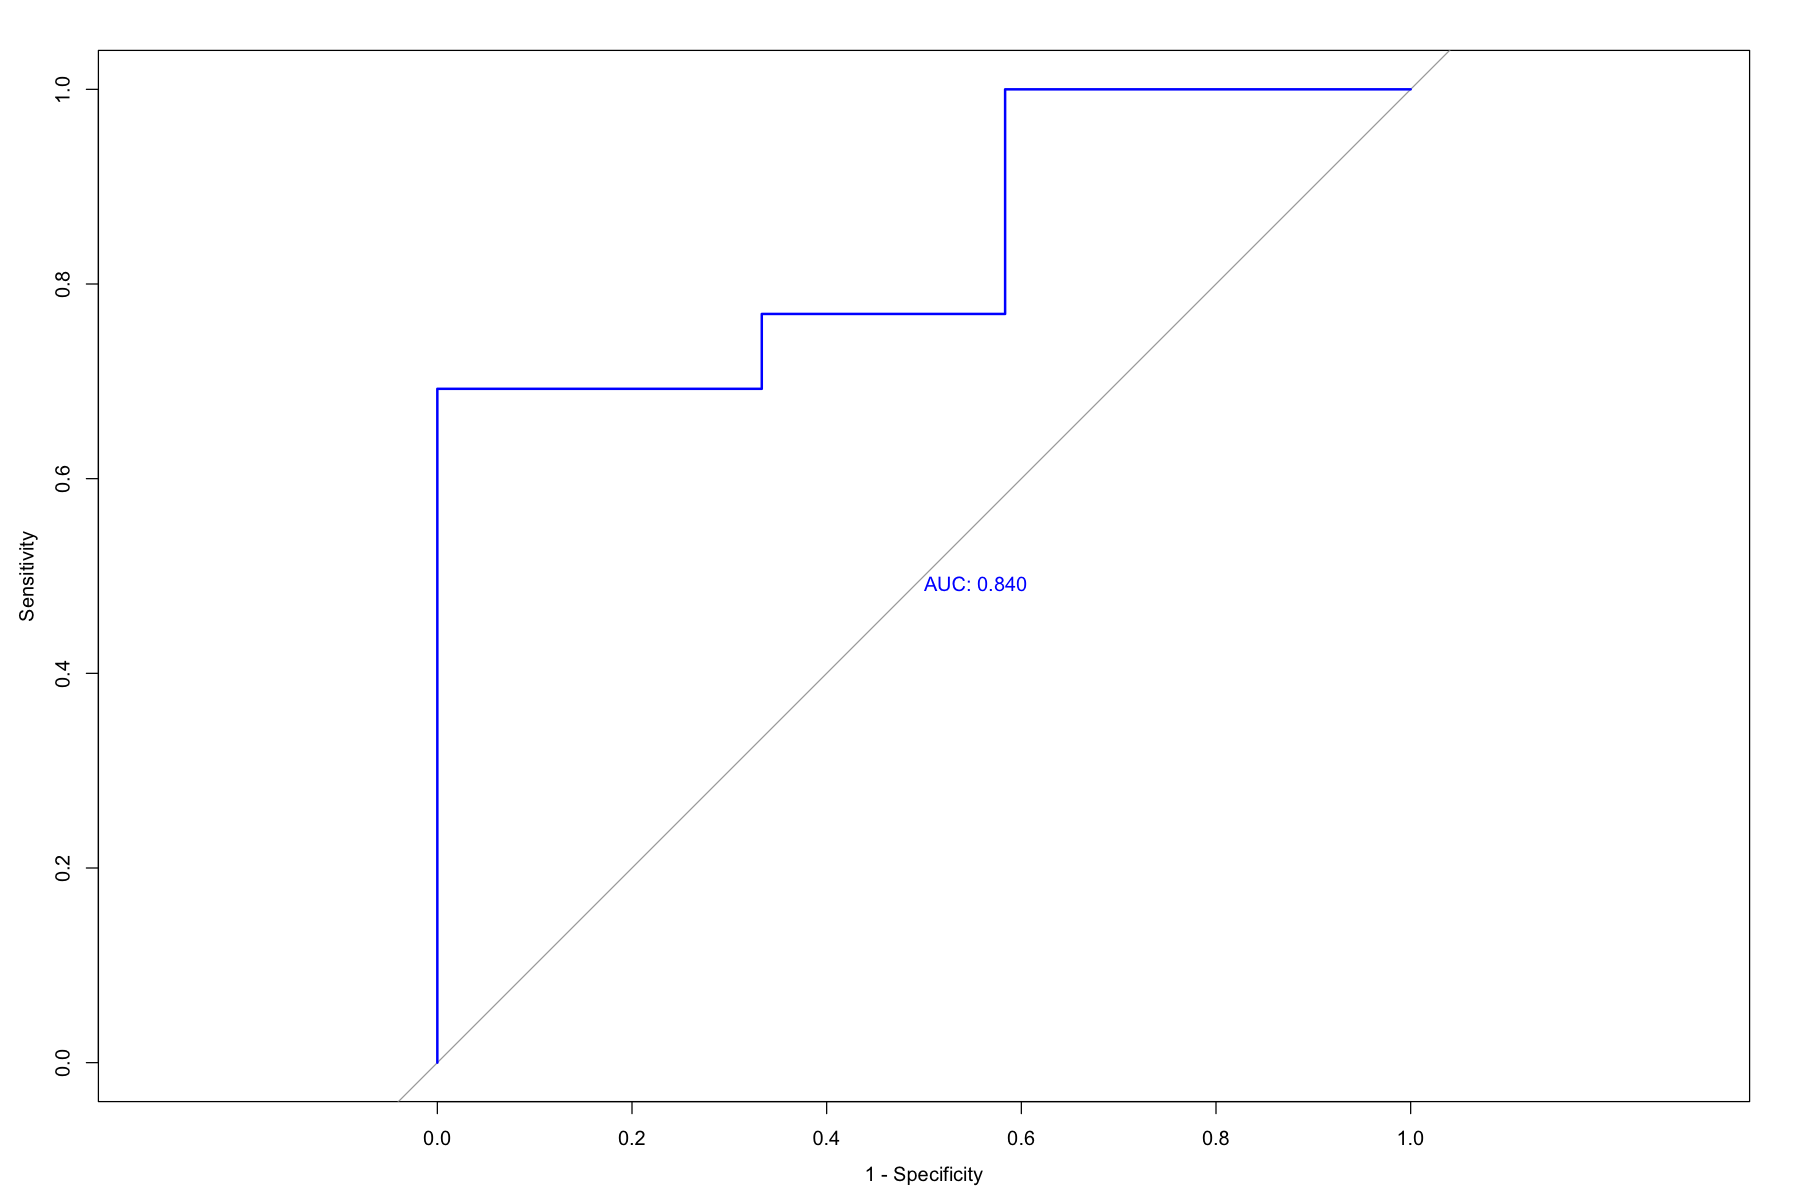

In [327]:
library(pROC)
values.roc1 <- roc(test.set$taking, probs.test )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE,col="blue")


### LDA

Let's now select a training set consider 60% of data and test set with 40%. The seed is set to 222.

In [328]:
## upload the library
library(MASS)
n <- nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]
model.mydata.lda <- lda(taking ~ budget + action+ cmngsoon +  action:cmngsoon, data=training.set)
model.mydata.lda

Call:
lda(taking ~ budget + action + cmngsoon + action:cmngsoon, data = training.set)

Prior probabilities of groups:
        0         1 
0.6486486 0.3513514 

Group means:
    budget actionTRUE  cmngsoon actionTRUE:cmngsoon
0 42.04167  0.2083333  58.08333            38.00000
1 73.73077  0.3076923 167.38462            69.23077

Coefficients of linear discriminants:
                             LD1
budget               0.018926925
actionTRUE           0.194405072
cmngsoon             0.008582673
actionTRUE:cmngsoon -0.006636469

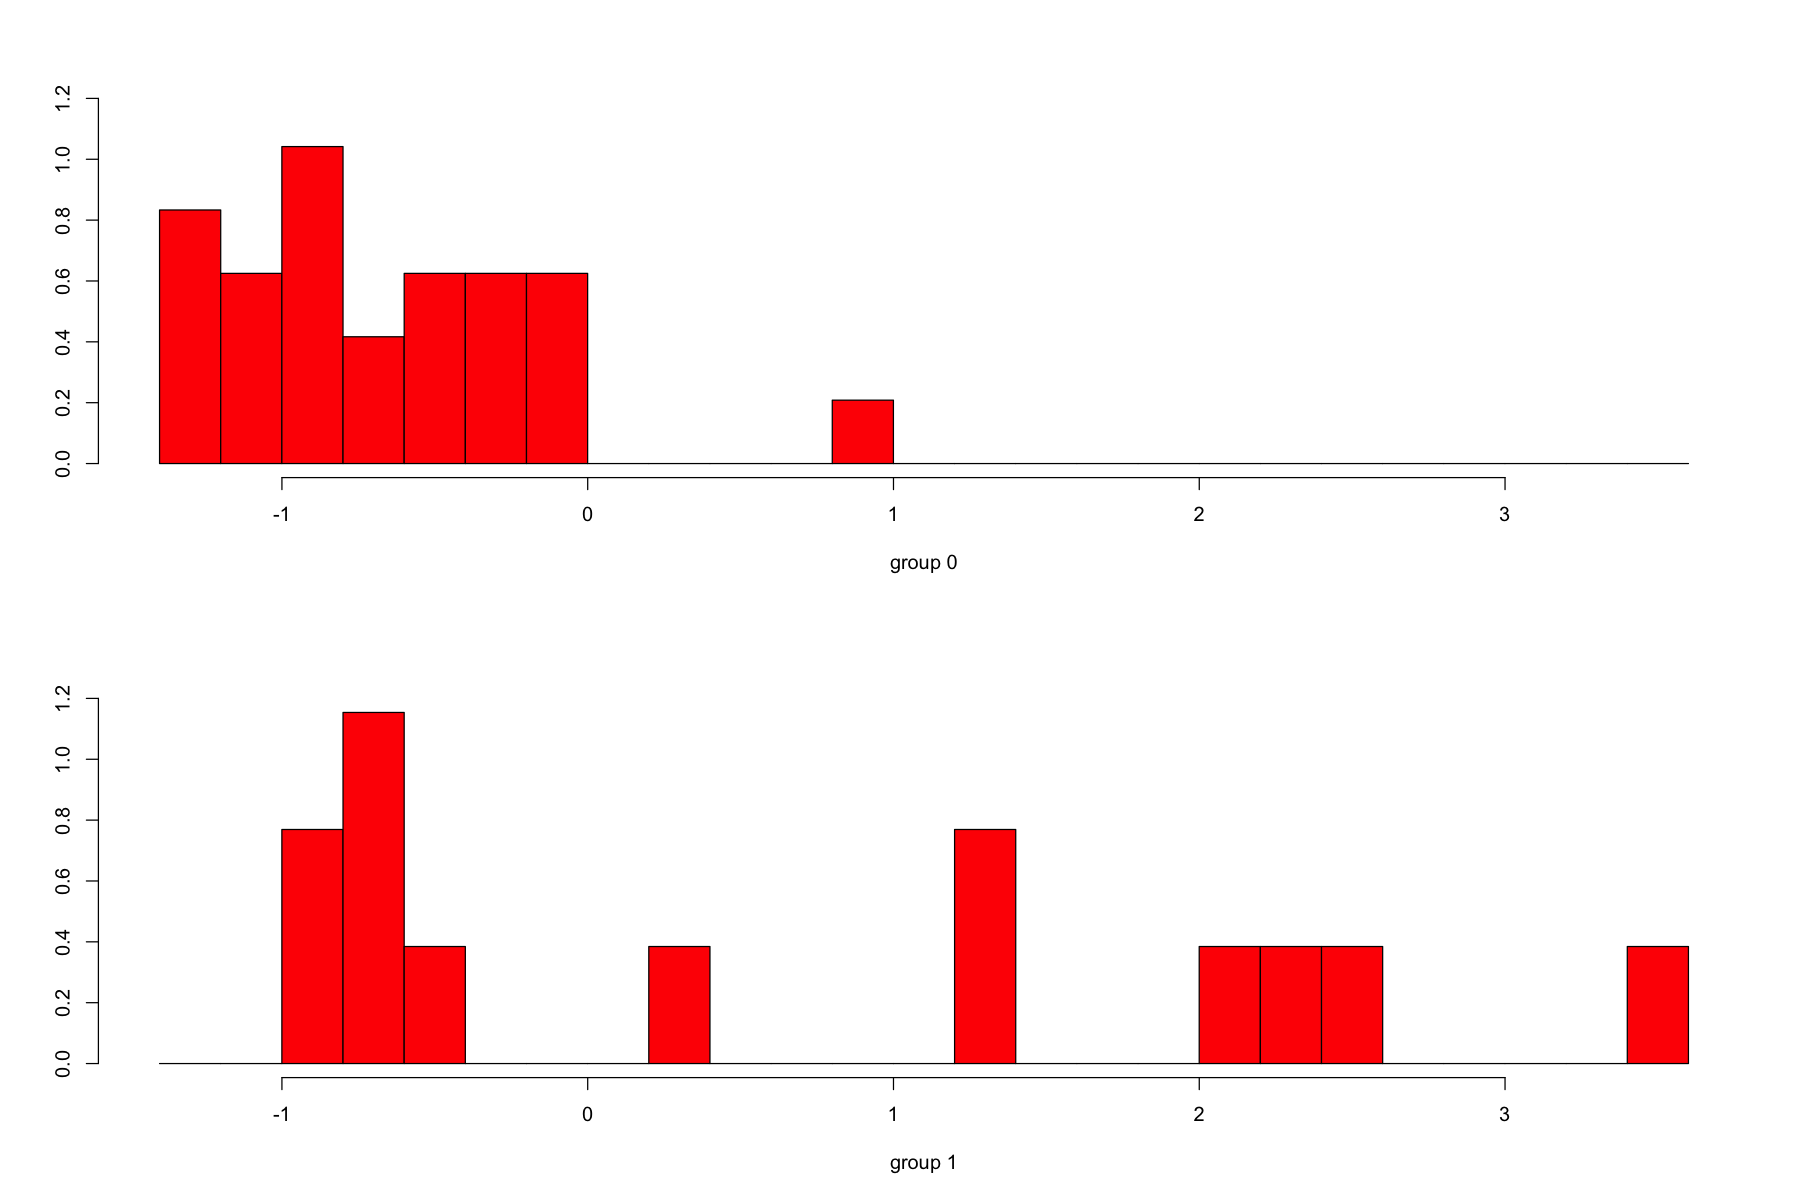

In [329]:
plot(model.mydata.lda,col="red")
par(mfrow=c(1,1))



if the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good. This could also happen because the observations are few and splitting the data set into 2 samples could be
bad for the analysis.
QDA could be also worse but we will check it later on.
The confusion matrix is:

In [330]:
preds.lda <- predict(model.mydata.lda, test.set)
preds.lda1 <- rep(0, nrow(test.set))
preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.lda1, taking=test.set$taking))



,0,1,Sum
0,12,9,21
1,0,4,4
Sum,12,13,25


- test error rate is: 9/25 
- sensitivity is: 4/13
- specitivity is: 1

So usign  model with lda (with interaction obtained in the previous logistic model) and evaluate it in a training set and test set, leads to an error on the test set equal too  36%, which is a bit high but acceptable.

The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

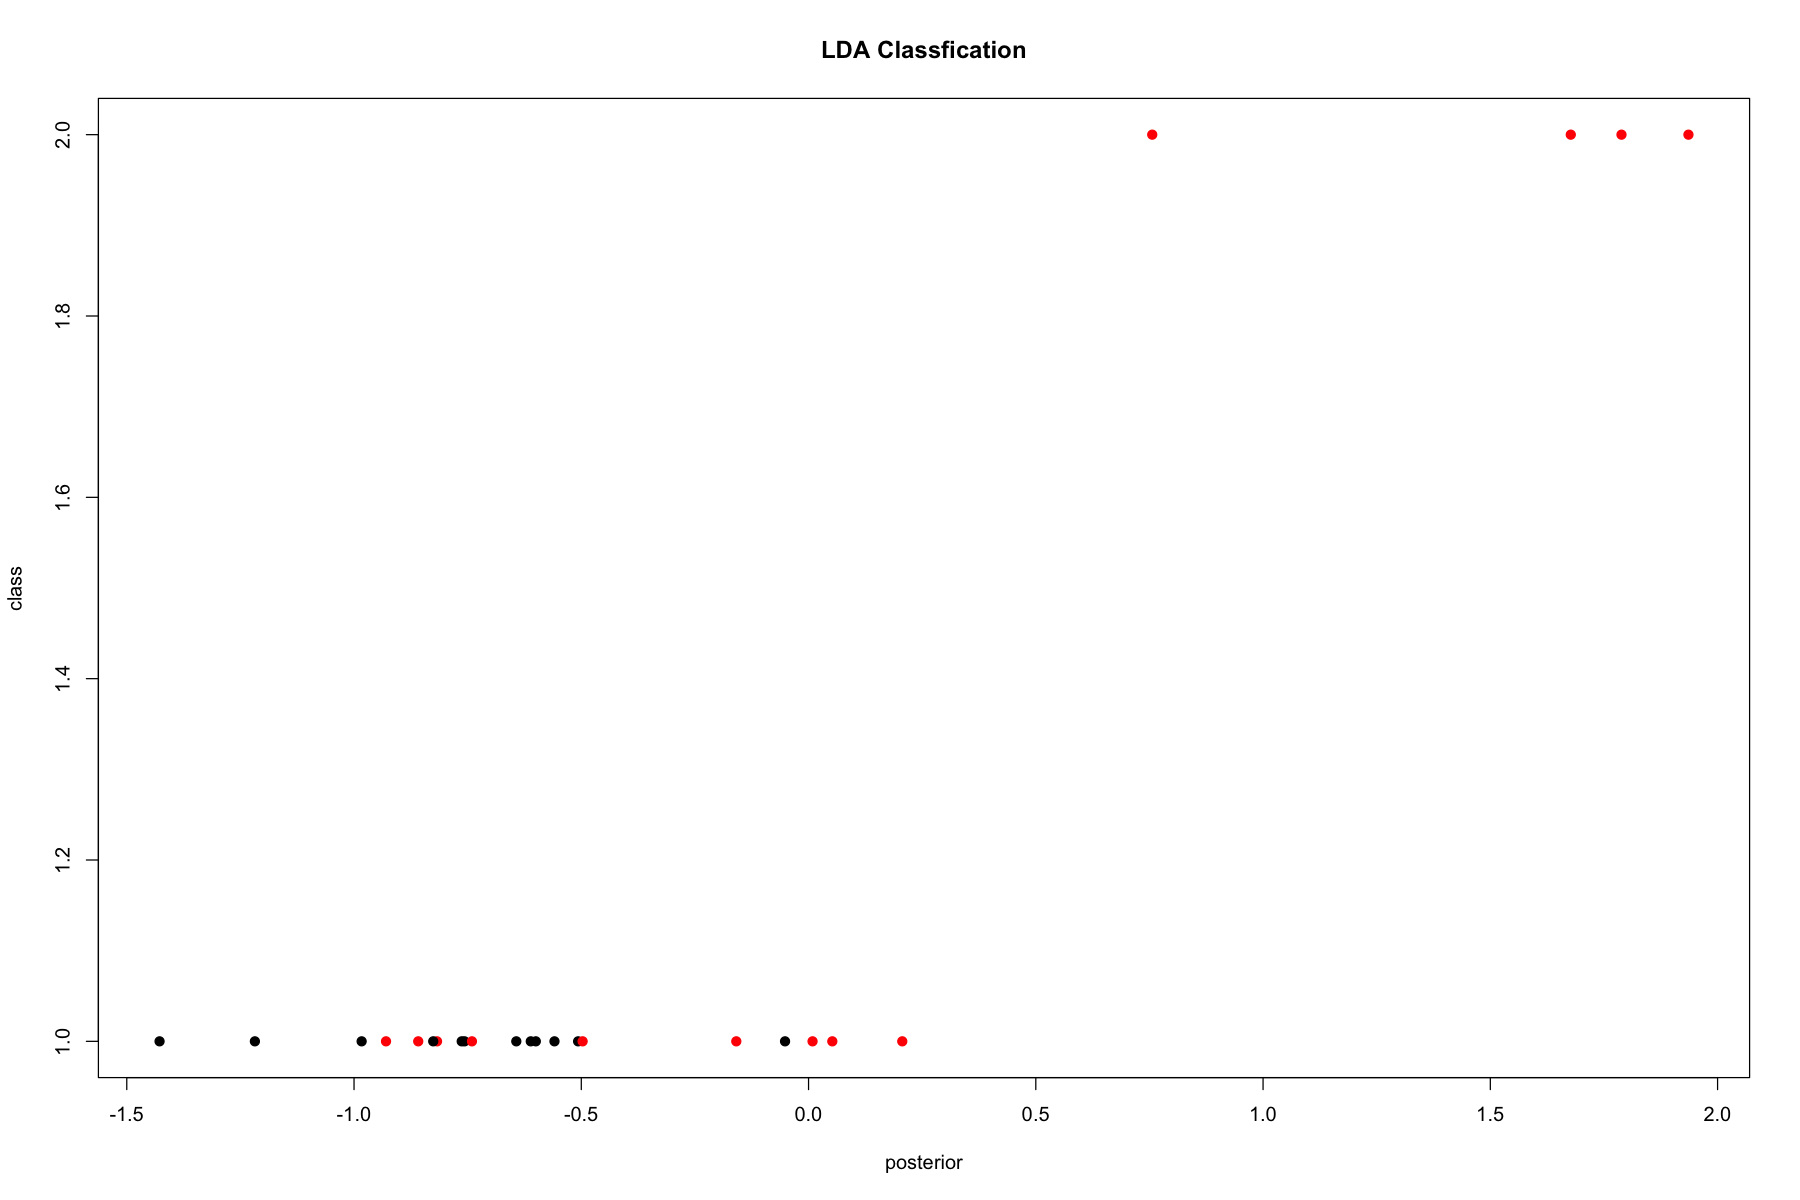

In [331]:
par(mfrow=c(1,1))
plot(preds.lda$x[,1], preds.lda$class, col=test.set$taking,xlab="posterior",ylab="class",pch=19,main="LDA Classfication")



Let's now consider the ROC curve for in order to understand how good is our classifier. 
WE can see that the AUC value is 0.782
we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also smaller ( even if they are pretty similar) then the one obtained with Logistic Regression, so we can say that logistic regression is better in this case.


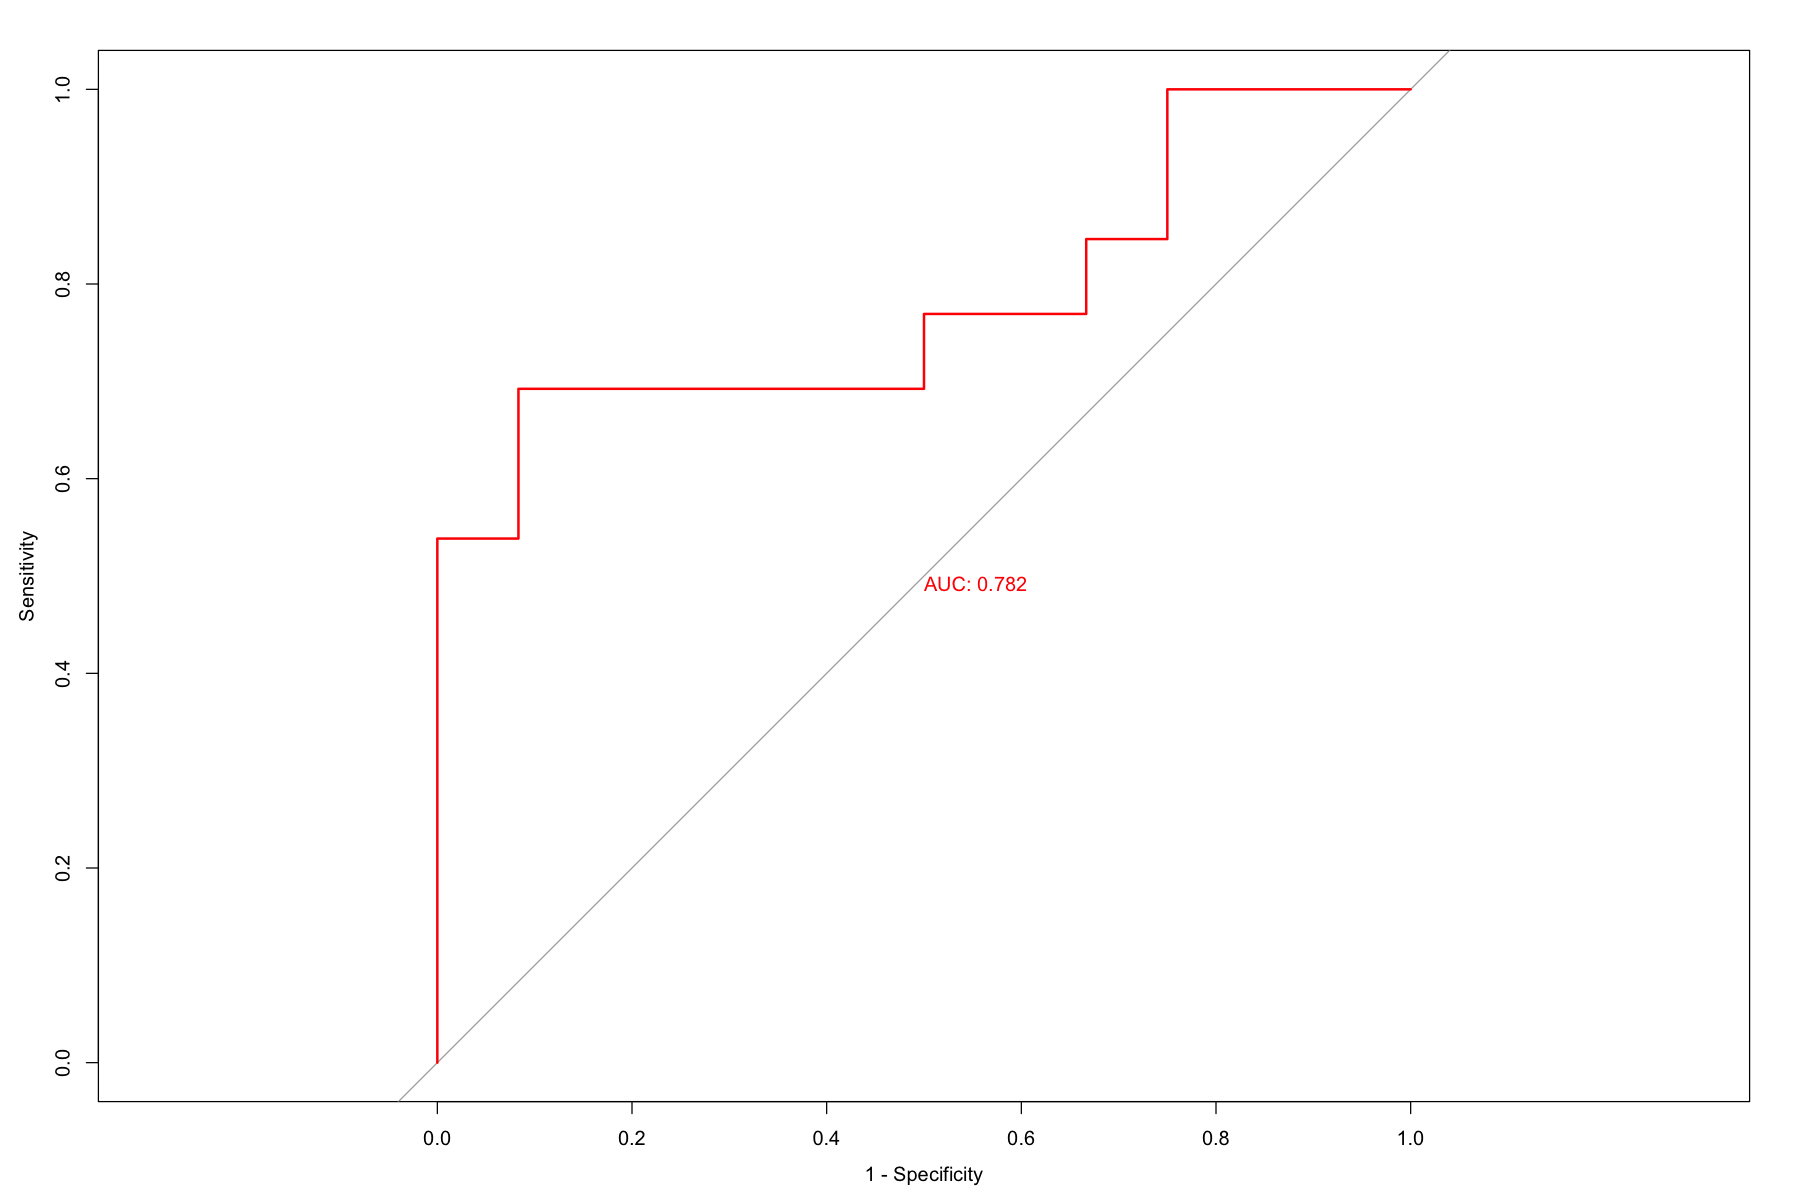

In [332]:
## ROC curve
library(pROC)

values.roc2 <- roc(test.set$taking, preds.lda$posterior[,2] )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=TRUE, auc.polygon=FALSE,col="red")
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon.col=TRUE)

# COMMENTARE

### QDA

Let's perform QDA

In [340]:
model.mydata.qda <- qda(taking ~ budget + action+ cmngsoon +  action:cmngsoon, data=training.set)
model.mydata.qda


Call:
qda(taking ~ budget + action + cmngsoon + action:cmngsoon, data = training.set)

Prior probabilities of groups:
        0         1 
0.6486486 0.3513514 

Group means:
    budget actionTRUE  cmngsoon actionTRUE:cmngsoon
0 42.04167  0.2083333  58.08333            38.00000
1 73.73077  0.3076923 167.38462            69.23077

The confusion matrix is:

In [337]:

# prediction and missclassification table
preds.qda <- predict(model.mydata.qda, test.set)
#preds.qda


preds.qda1 <- rep(0, nrow(test.set))
preds.qda1[preds.qda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.qda1, taking=test.set$taking))


,0,1,Sum
0,12,10,22
1,0,3,3
Sum,12,13,25


- test error rate is: 10/25  
- sensitivity is: 3/13
- specitivity is:1



The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.


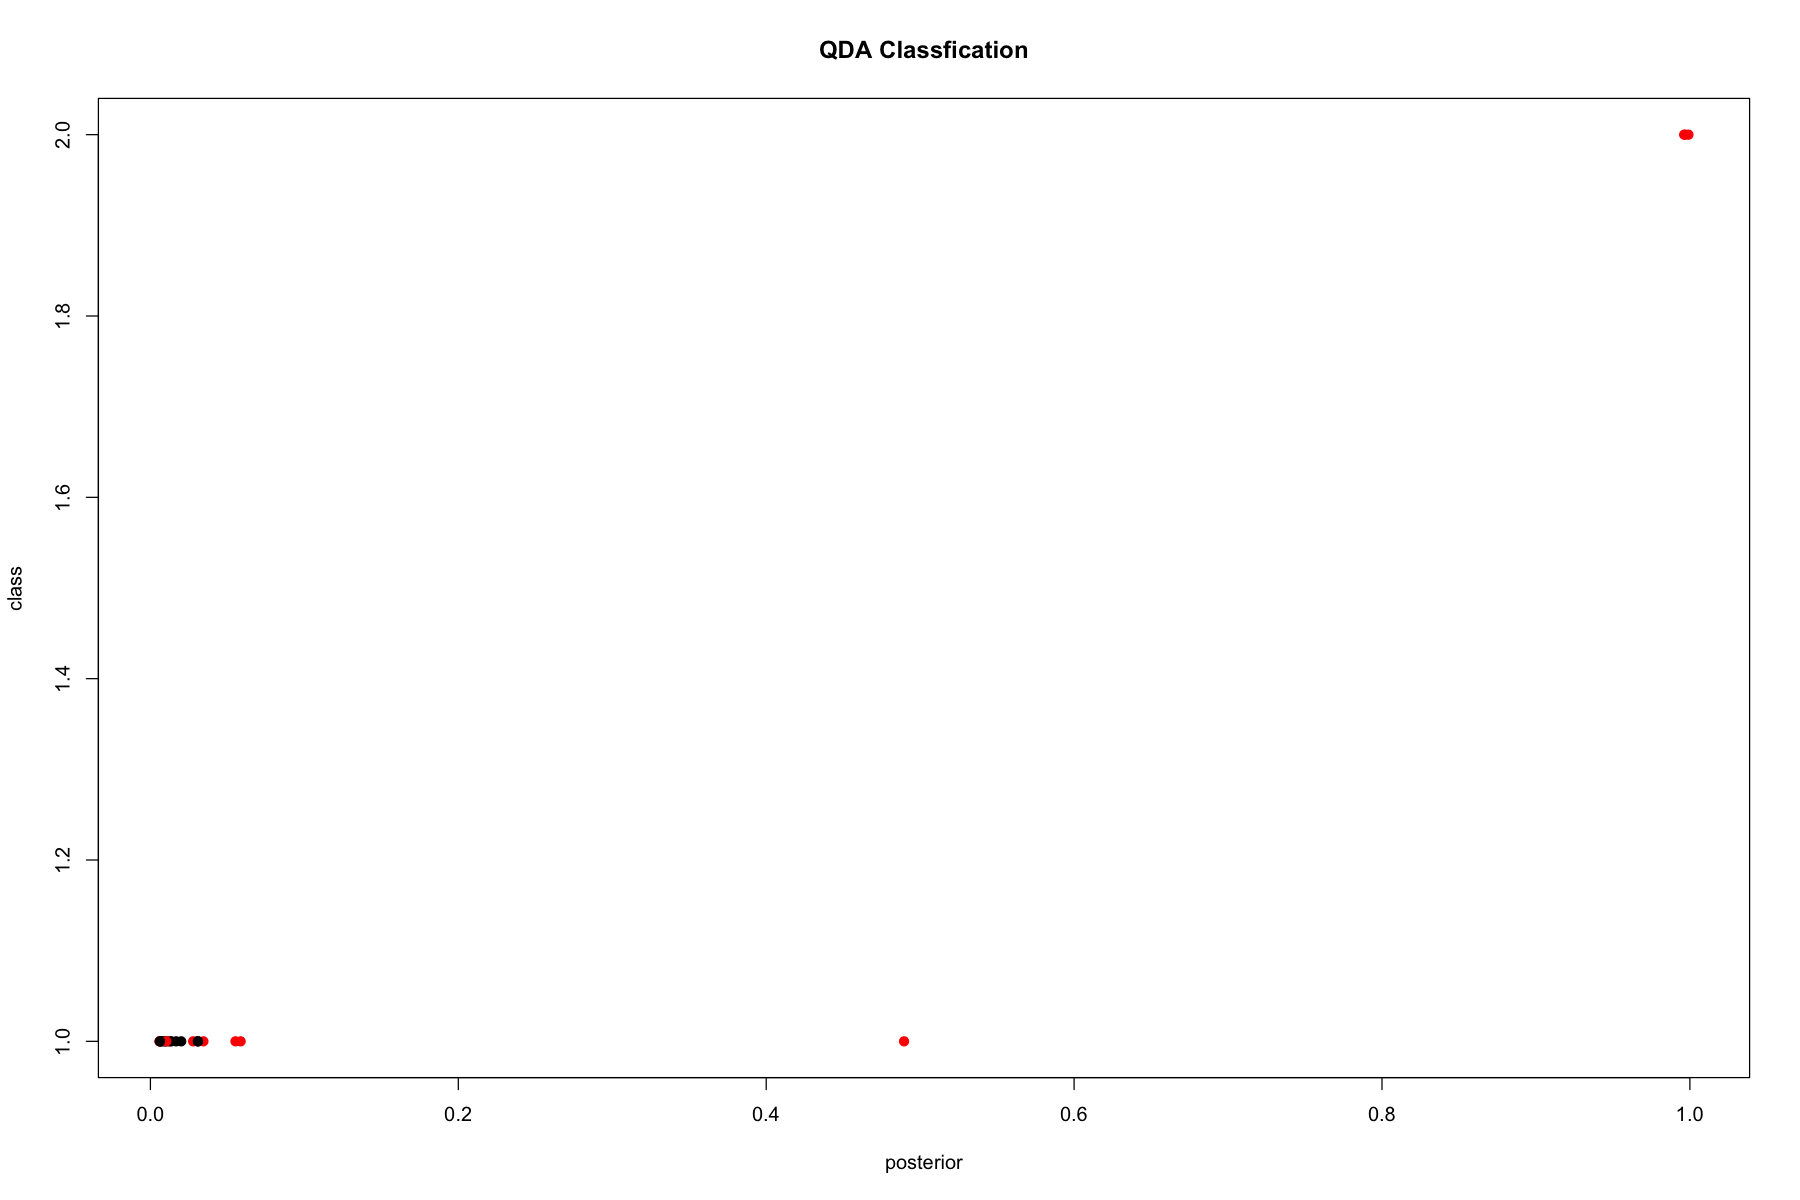

In [338]:
par(mfrow=c(1,1))
plot(preds.qda$posterior[,2], preds.qda$class,xlab="posterior",ylab="class", col=test.set$taking,pch=19,main="QDA Classfication")


Let's now consider the ROC curve for in order to understand how good is our classifier. 
We can see that the AUC value is 0.763

we know that as much closer AUC is to 1 much the model is good, so in this case is not so bad but we would rather have an higher value.
It is also smaller  then the one obtained with Logistic Regression and equal to one obained with LDA, so we can say that logisti regression is better in this case.

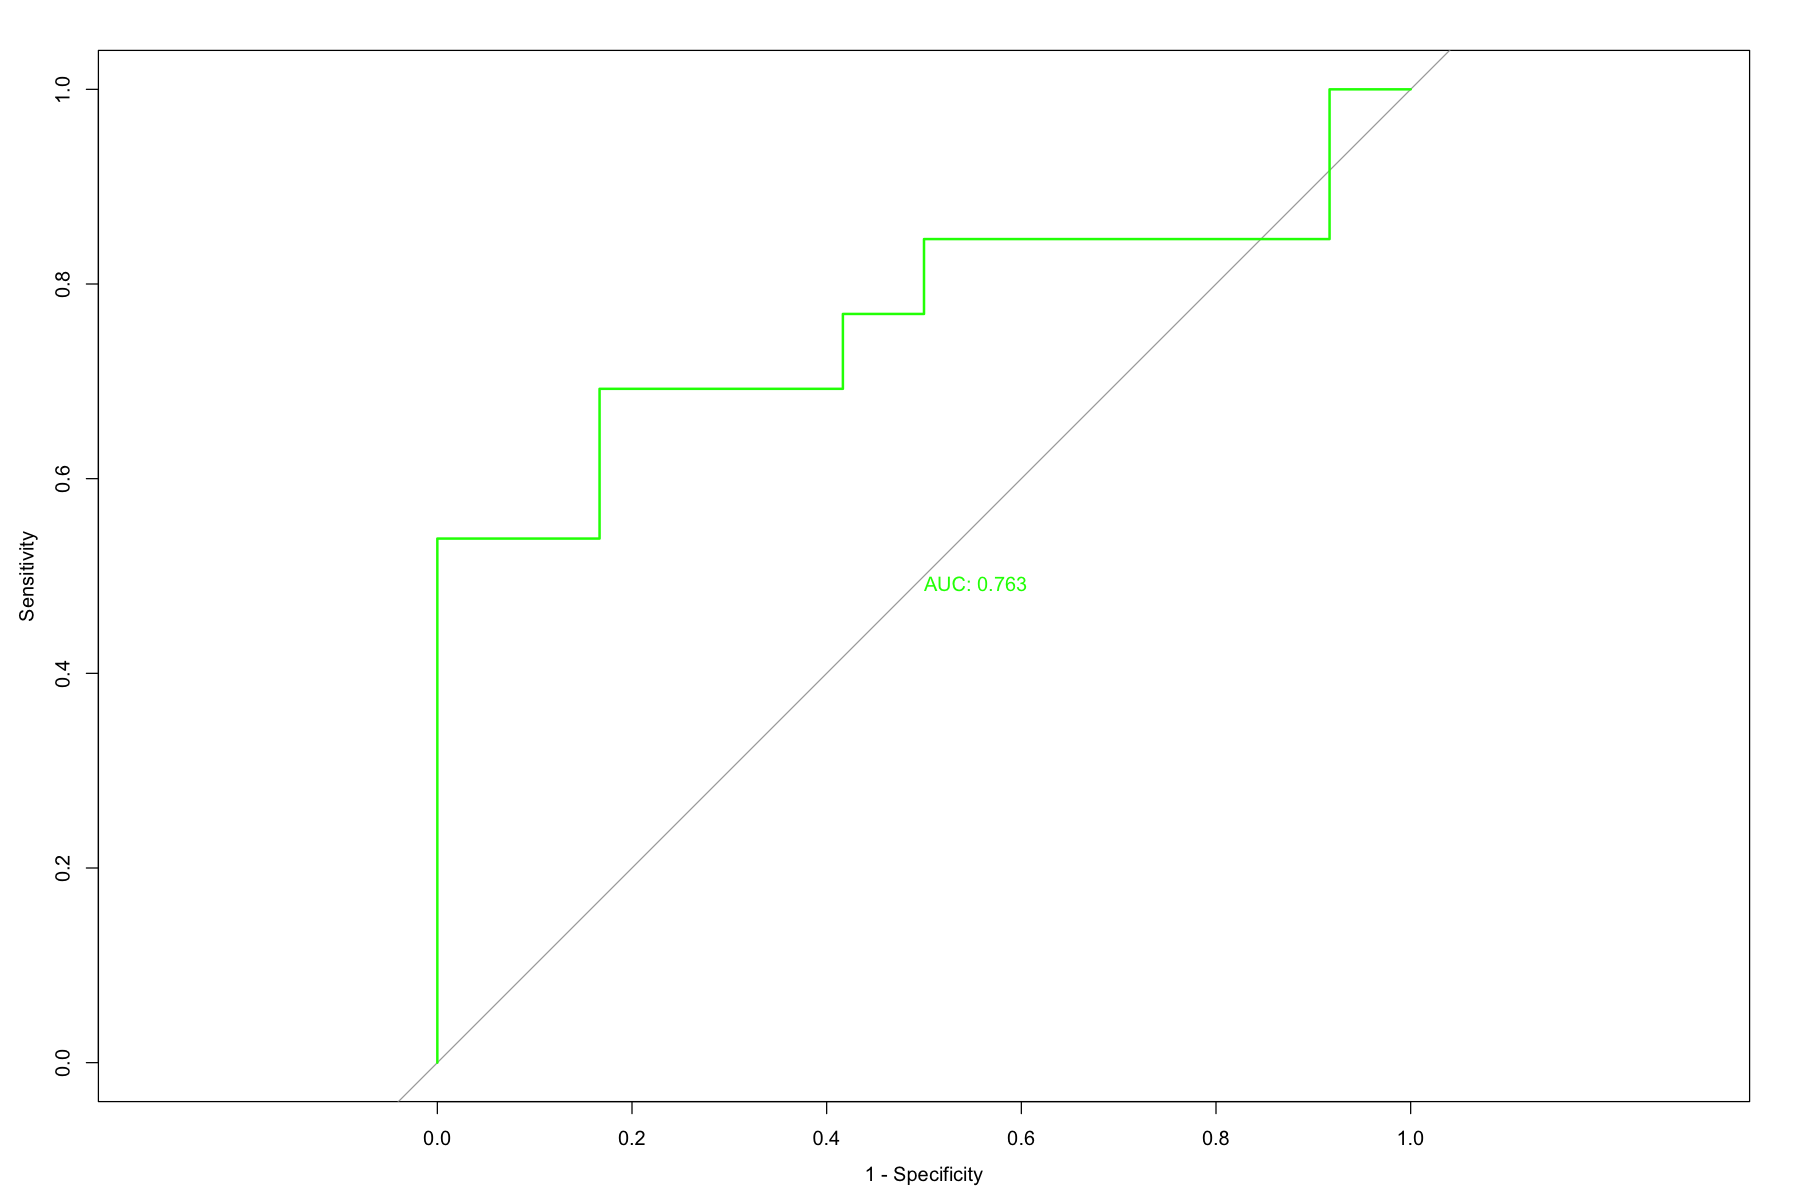

In [339]:
values.roc3 <- roc(test.set$taking, preds.qda$posterior[,2] )
options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE, col="green")


### CONCLUSION POINT 1

Based on ROC curve (plot below) we see that the best classifier is the one obtained with the Logistic Regression (Highest AUC).
So we see that:
- Budget affects positively the odds of being a high-selling film.
- cmngsoon affects positively the odds of being a high-selling film.
- actionTRUE (even if from p-value is not significant but we keep it as hierarcy principle suggests) affects positively the odds of being a high-selling film.
- actionTRUE:cmngsoon (the interaction) affects negatively the odds of being a high-selling film.

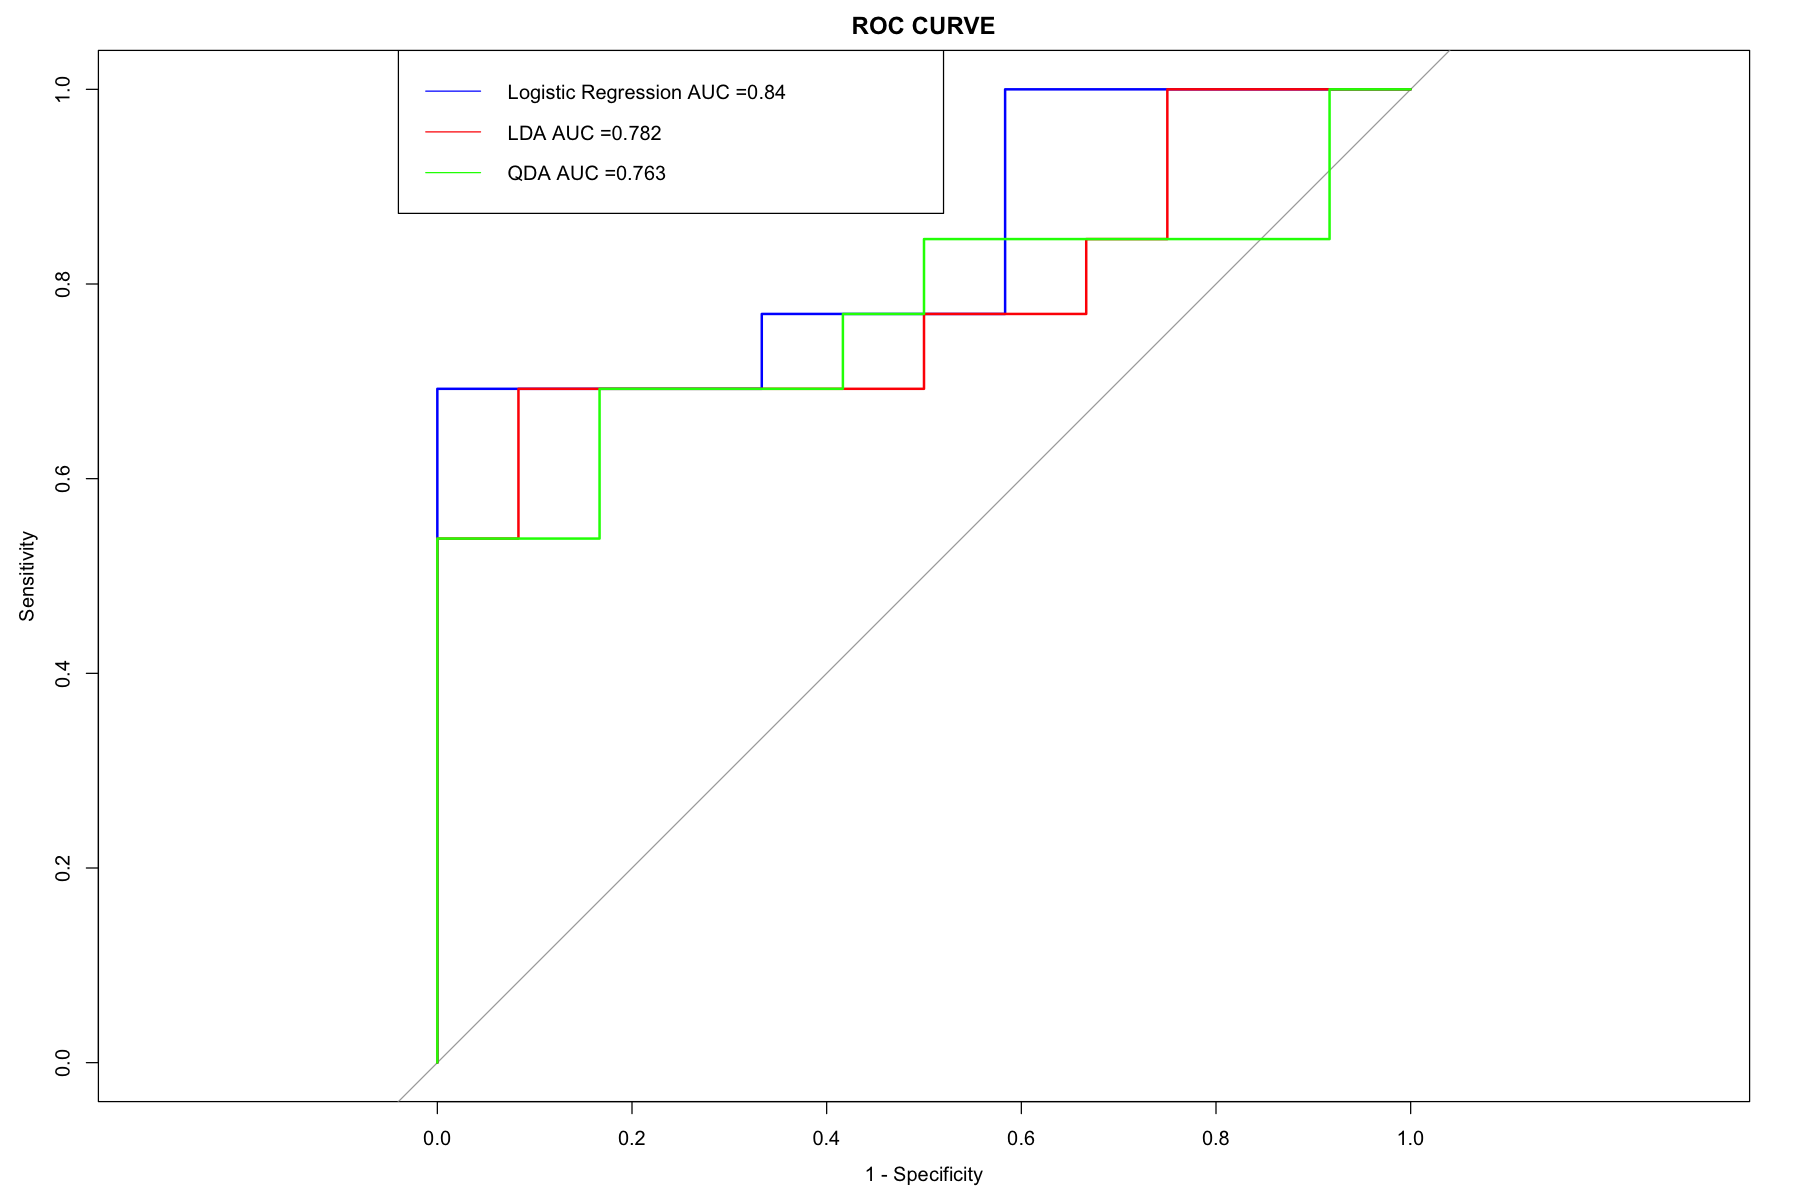

In [197]:
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=FALSE, auc.polygon=FALSE,col="blue",main="ROC CURVE")
lines(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=FALSE, auc.polygon=FALSE,col="red",add=TRUE)
lines(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0),lty=1,print.auc=FALSE, auc.polygon=FALSE,col="green",add=TRUE)
legend("topleft",legend=c(paste0("Logistic Regression AUC =",round(auc(values.roc1),3)),paste0("LDA AUC =",round(auc(values.roc2),3)),paste0("QDA AUC =",round(auc(values.roc3),3))),lty=c(1,1,1),col=c("blue","red","green"))



### RIDGE

Let's try with Ridge regression with all variables including the interactions obtained in the previous case.
The complete dataset is (first 3 rows):

In [216]:
 load("movie.RData")

 mydata<-movie

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
taking <- rep(1, length(mydata$budget))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
taking [mydata$box<20000000]=0
## create the dataset we need


#if you want to add a new variable into a mydata
mydata<-data.frame(taking=taking ,mydata)

mydata$action<-as.factor(mydata$action)
mydata$taking<-as.factor(mydata$taking)
mydata$sequel<-as.factor(mydata$sequel)
mydata$comedy<-as.factor(mydata$comedy)
mydata$horror<-as.factor(mydata$horror)
mydata$mprating<-as.factor(mydata$mprating)
mydata$animated<-as.factor(mydata$animated)
mydata[1:3,]

[1] 62 13

taking,box,mprating,budget,starpower,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait
0,19167085,4,28.0,19.83,FALSE,FALSE,TRUE,FALSE,FALSE,7860.5,10,144,0.49
1,63106589,2,150.0,32.69,TRUE,FALSE,FALSE,TRUE,FALSE,5737.0,59,468,0.79
0,5401605,4,37.4,15.69,FALSE,FALSE,TRUE,FALSE,FALSE,850.0,24,198,0.36


In [237]:
library(glmnet)
y <-  mydata$taking
X <- model.matrix(taking ~ . + action:cmngsoon  , data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0,family='binomial')


Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  16  over the graph indicate the number of covariates entering the model (it considers also the classes of a single covariate for example : covariate "scopo" ->class "istruzione")as  $ \lambda$ varies: 16 is repeated, as ridge regression is not a selection method.

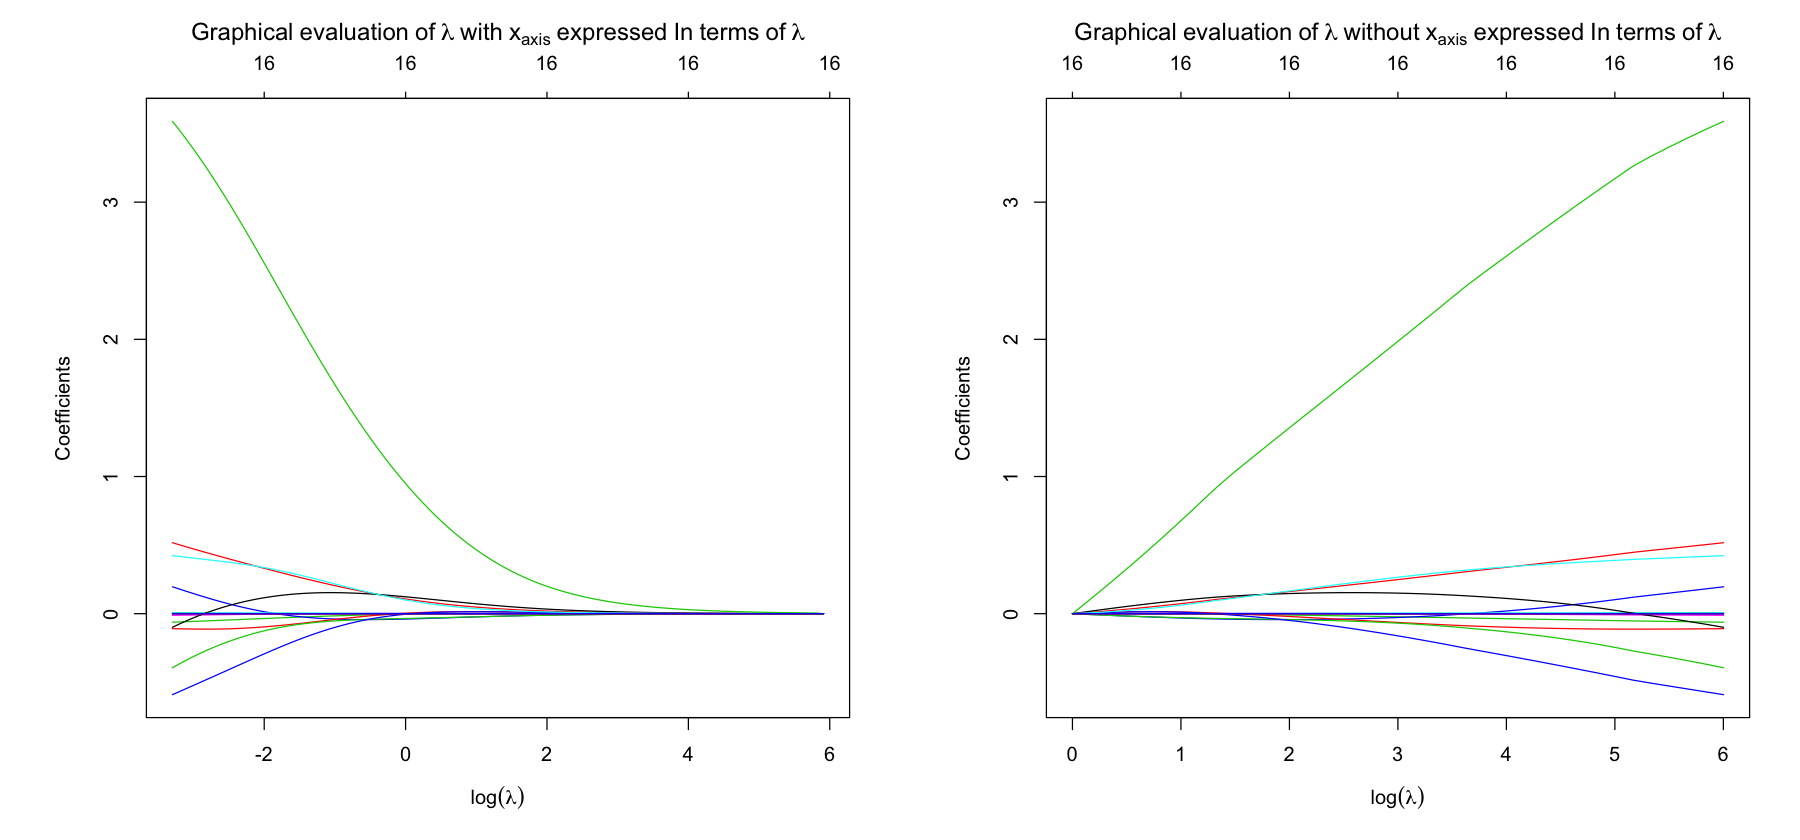

In [239]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.4 \
And the MSE is:0.76

[1] 0.04055797

[1] 0.7601862

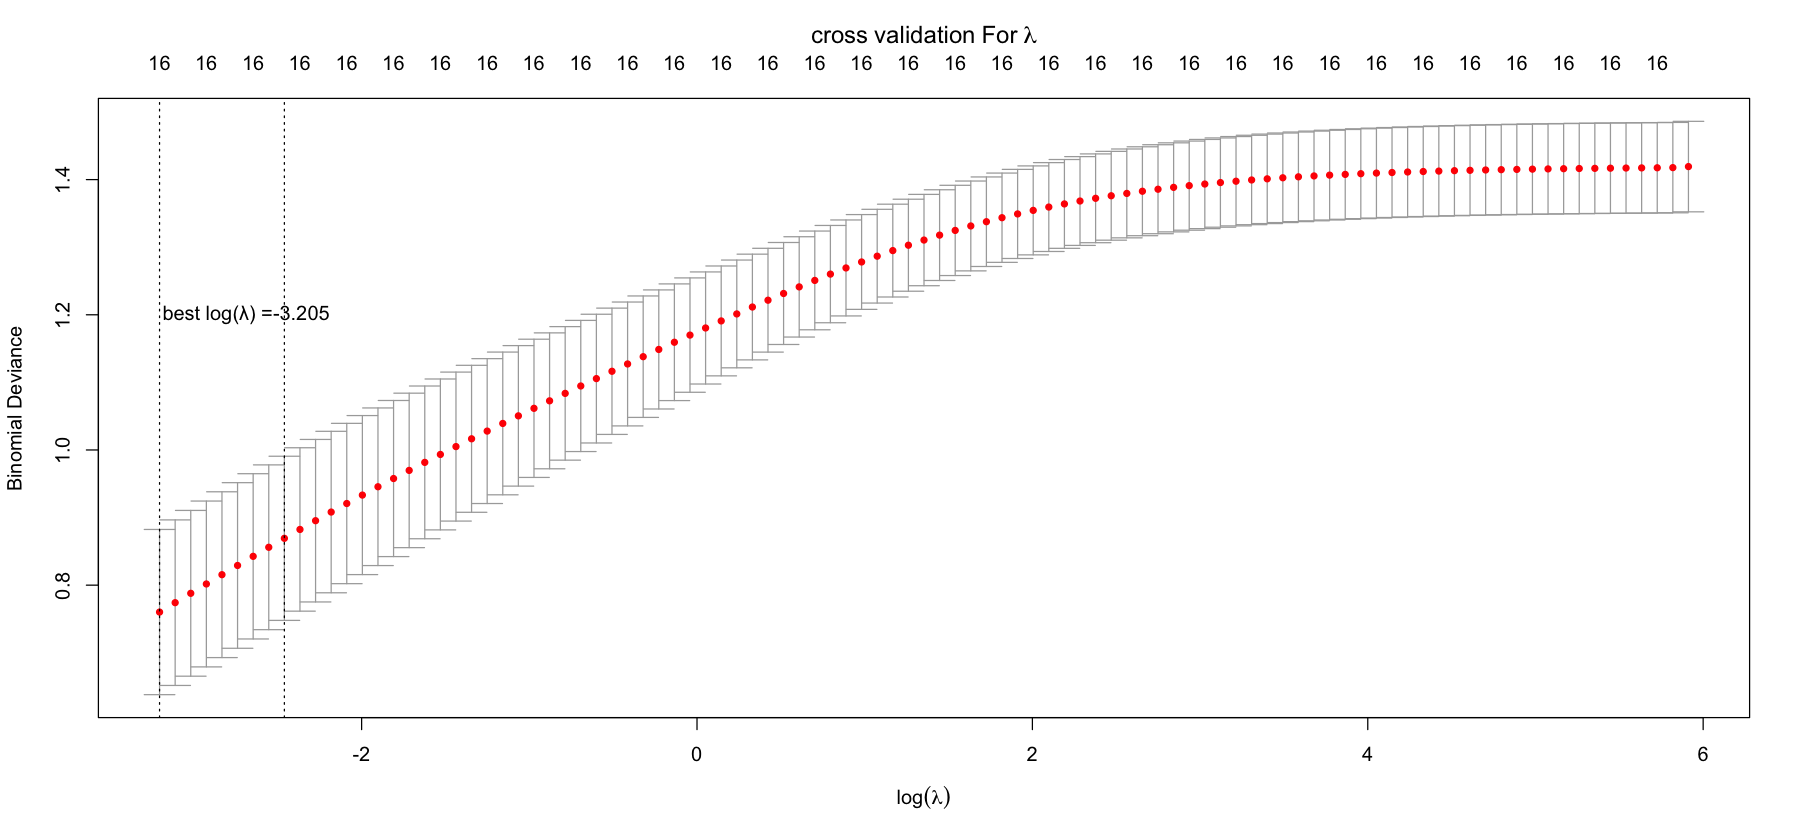

In [240]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0,family='binomial')
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=1.2, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.63


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 0, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 16 0.6227 0.04056

17 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)         -4.305648e+00
box                  1.121348e-07
mprating2            5.031414e-01
mprating3           -6.013218e-02
mprating4            1.805937e-01
budget               7.199533e-03
starpower           -1.104850e-02
sequelTRUE          -7.622184e-02
actionTRUE          -1.100304e-01
comedyTRUE          -3.670024e-01
animatedTRUE        -5.688737e-01
horrorTRUE           4.178820e-01
addict              -1.296578e-05
cmngsoon             1.582585e-03
fandango            -1.481976e-04
cntwait              3.528809e+00
actionTRUE:cmngsoon -7.913817e-04

[1] 0.6348329

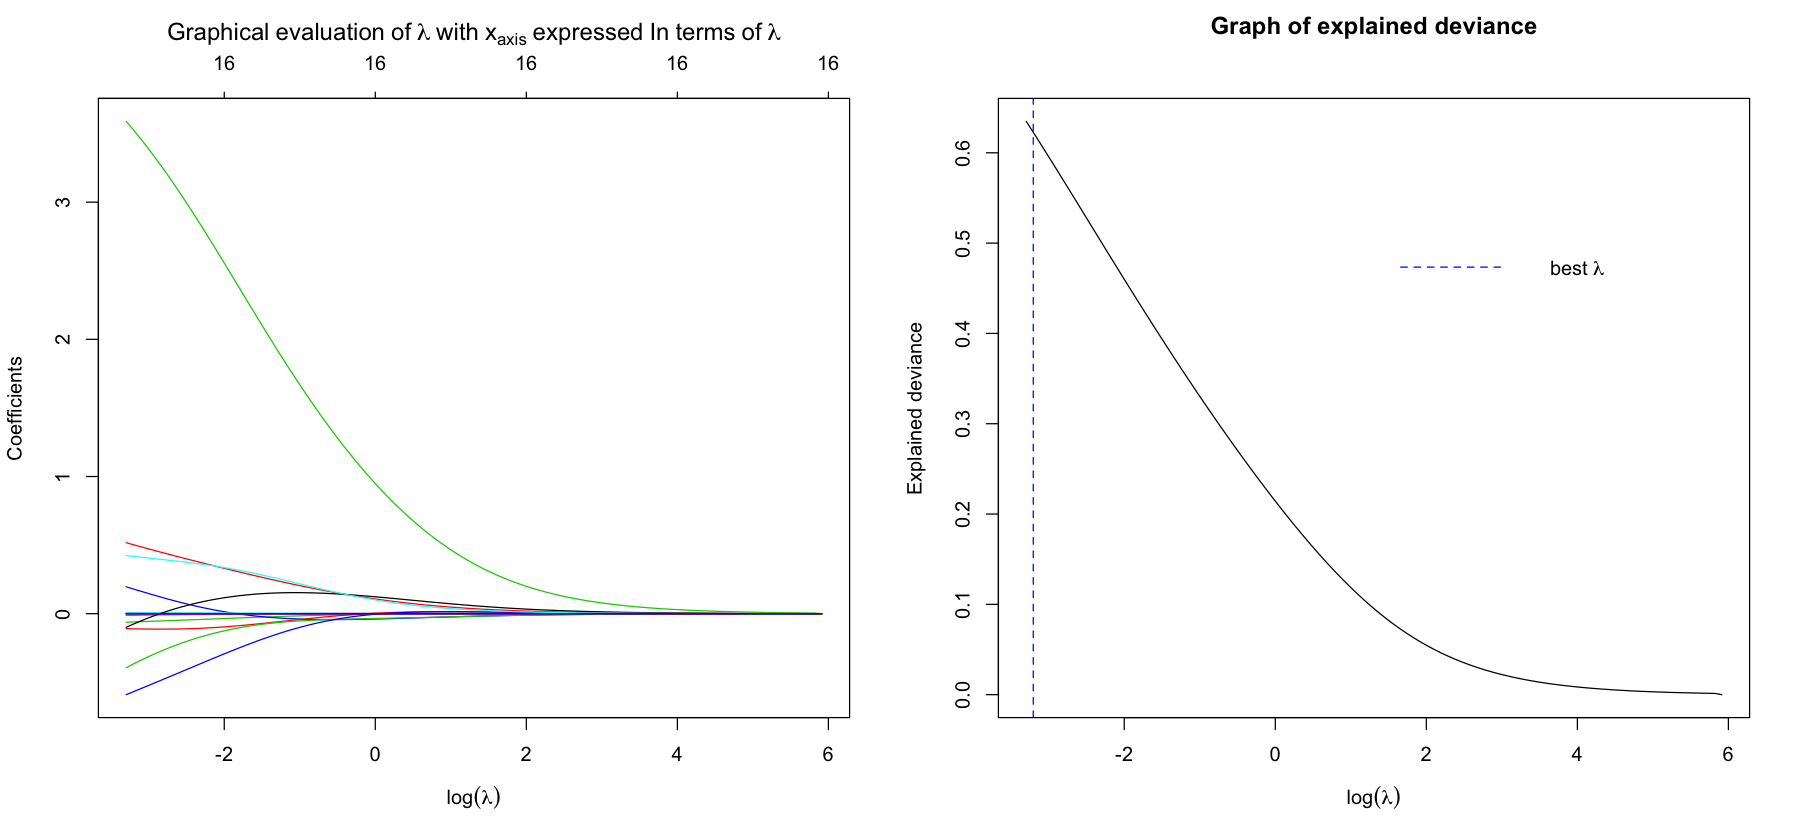

In [241]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda,family='binomial')
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 1,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO
Let's perform the analysis usign lasso.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 15 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:15 is not repeated, as lasso regression is a selection method.

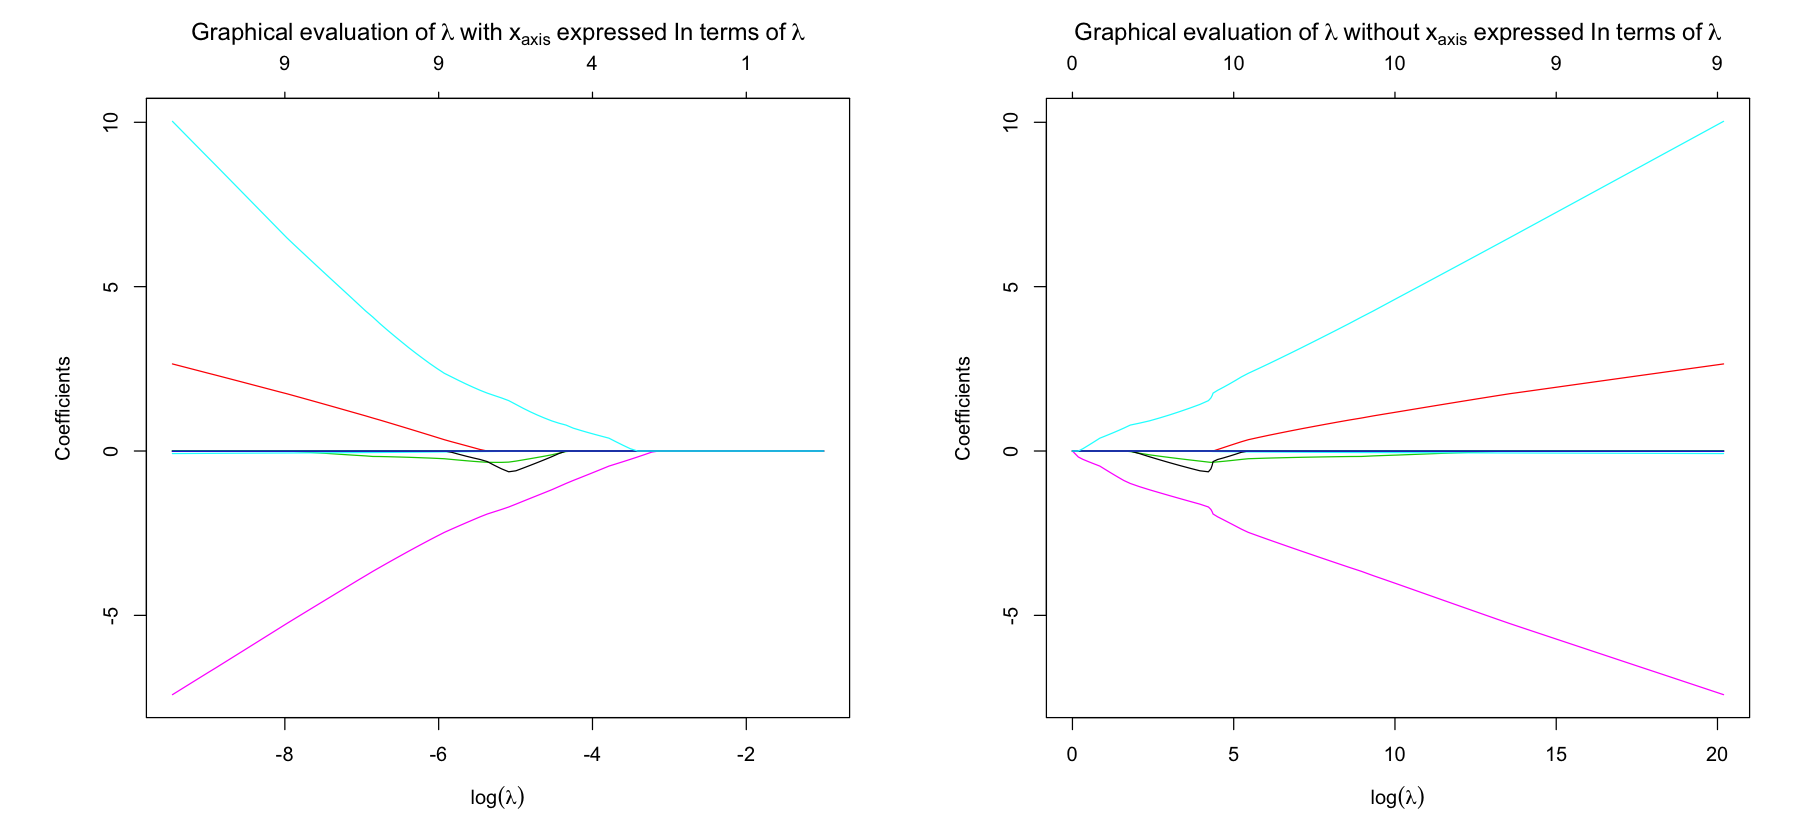

In [243]:
m.lasso <- glmnet(X, y, alpha=1,family="binomial")
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.001\
And the MSE is:0.25

[1] 0.001391329

[1] 0.2491103

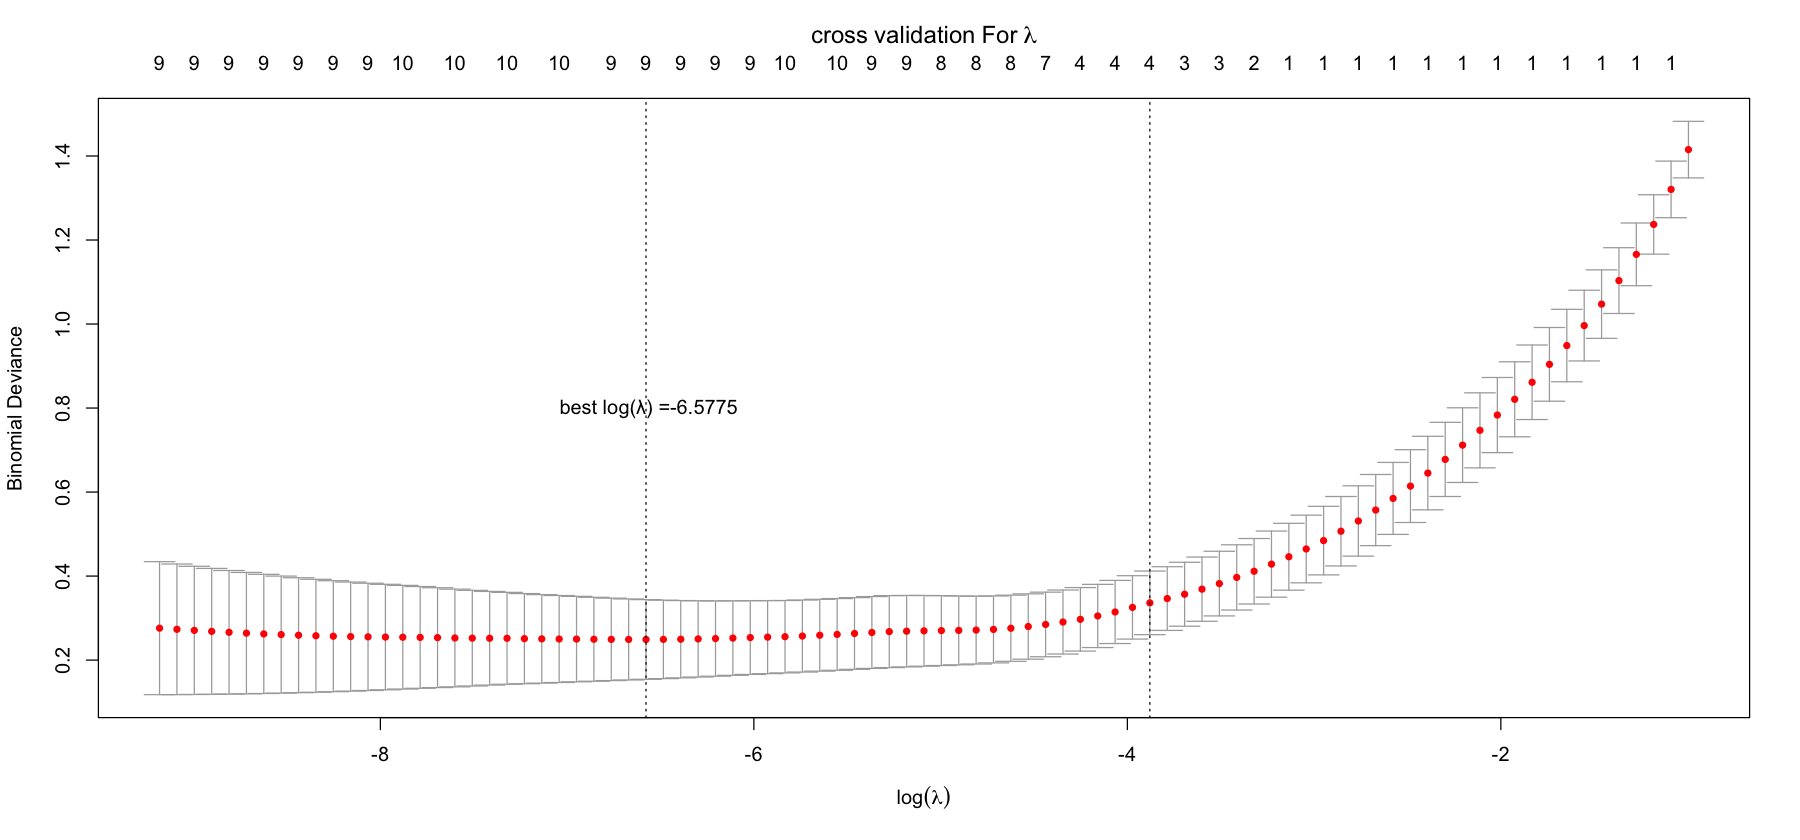

In [250]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1,family="binomial")
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min), y=0.8, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse

On the basis of MSE , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model (10), graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.99 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular mprating4, budget,sequelTRUE, actionTRUE, animatedTRUE, horrorTRUE, actionTRUE:cmngsoon have been removed


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 1, lambda = best.lambda) 

     Df   %Dev   Lambda
[1,]  9 0.9836 0.001391

17 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)         -1.712636e+01
box                  9.915311e-07
mprating2            8.169679e-01
mprating3           -1.580446e-01
mprating4            .           
budget               .           
starpower           -4.157441e-02
sequelTRUE           .           
actionTRUE           .           
comedyTRUE          -3.274538e+00
animatedTRUE         .           
horrorTRUE           .           
addict              -2.708359e-04
cmngsoon             7.476920e-03
fandango            -1.906003e-03
cntwait              3.449479e+00
actionTRUE:cmngsoon  .           

[1] 10

[1] 0.9990689

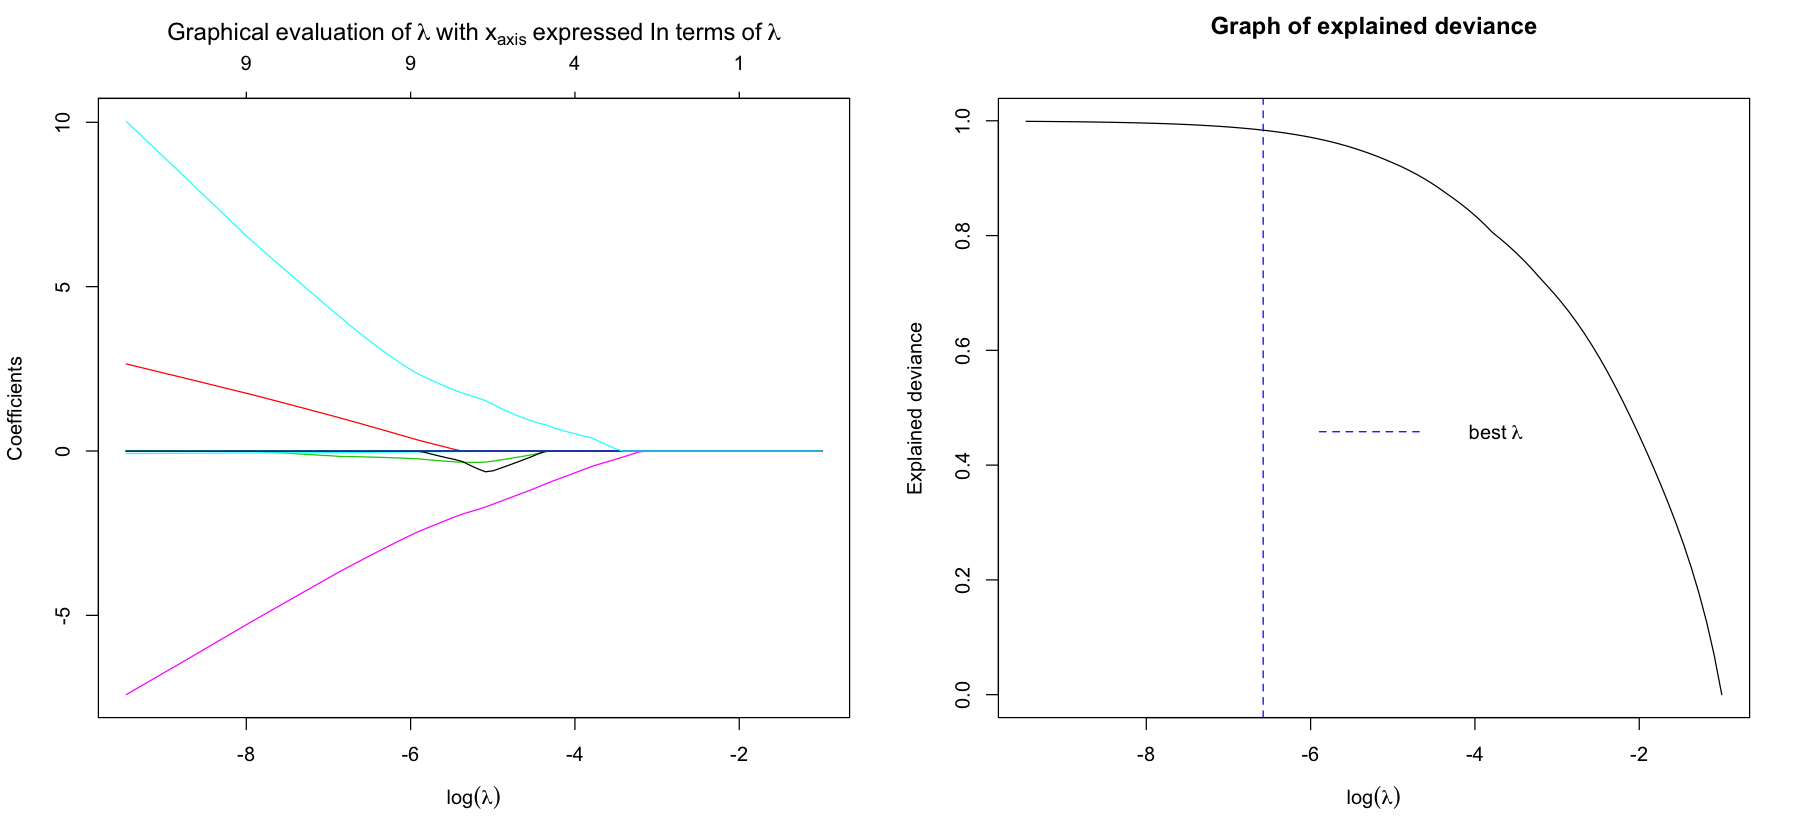

In [253]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda,family="binomial")
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x =-6.5,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222.

In [272]:
library(pls)
set.seed(222)
mydata$taking<-as.numeric( mydata$taking)
#y <-  mydata$taking
#X <- model.matrix(taking ~ .  , data=mydata)[,-1]
m.pcr <- pcr(taking ~ .  + action:cmngsoon, ncomp=16, scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)

Data: 	X dimension: 62 16 
	Y dimension: 62 1
Fit method: svdpc
Number of components considered: 16

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.5015    0.452   0.4455   0.4512   0.4431   0.4364   0.4282
adjCV       0.5015    0.451   0.4444   0.4499   0.4417   0.4336   0.4255
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.4278   0.4208   0.4185    0.4184    0.4313    0.4299    0.4388
adjCV   0.4266   0.4168   0.4145    0.4171    0.4328    0.4233    0.4341
       14 comps  15 comps  16 comps
CV       0.4291    0.4604    0.4688
adjCV    0.4210    0.4503    0.4581

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         27.02    44.10    55.11    64.32    71.61    78.07    82.87    86.95
taking    22.61    26.26    27.64    31.49    35.94    39.15    39.33    44.44
        9 comps  10 comp

The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs
We see that the  number of PCs needed is:  16
While the best number of components we can use for the analysis, based on R selection is :1
We also have that the value of MSE is reported below.
1 is very small, but we keep it for the following analysis knowing that probably an higher number of PCs is needed.

In [273]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=16))

       (Intercept)  1 comps
CV          0.2515   0.2043
adjCV       0.2515   0.2034

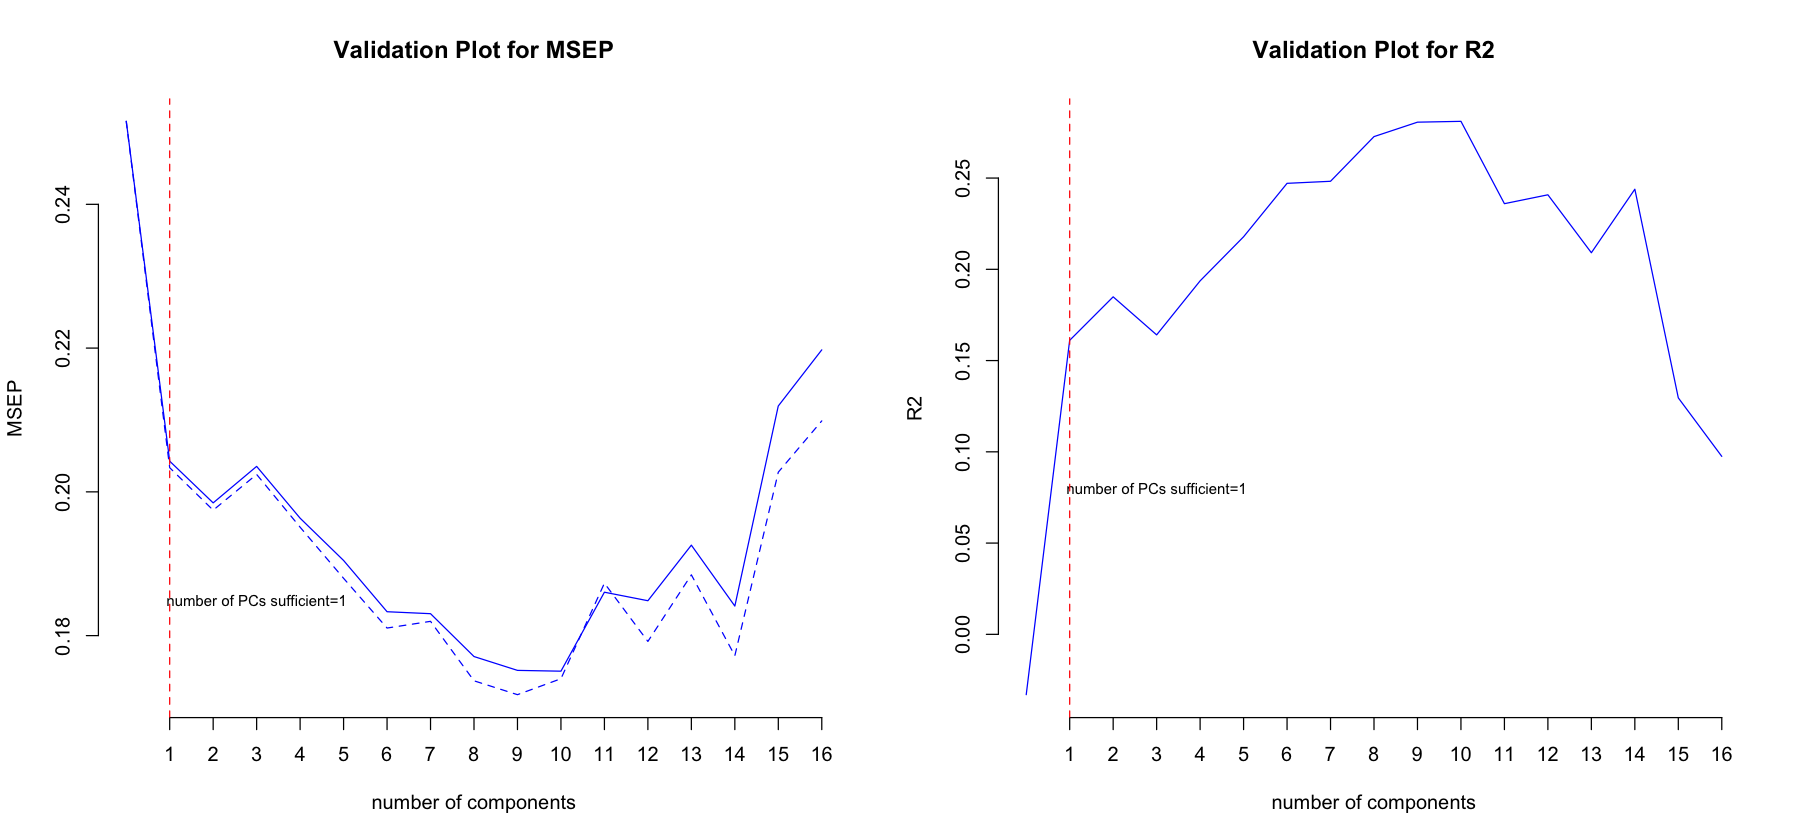

In [277]:
par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Validation Plot for MSEP', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:16)
## add on the y-axis
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=16)+2, y=0.185,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=16)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=16), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Validation Plot for R2', axes=FALSE,col="blue")
axis(1, at=1:16)
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=16)+2, y=0.08,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=16)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=16), col="red",lt=2)

Let's look how much variance is explained by the 16 components (100%).
While te explained variance for our 1 PC obtained before is: 27.02%

Comp 1     Comp 2     Comp 3     Comp 4     Comp 5     Comp 6     Comp 7 
27.0197678 17.0771306 11.0108804  9.2092710  7.2898074  6.4618487  4.7982970 
    Comp 8     Comp 9    Comp 10    Comp 11    Comp 12    Comp 13    Comp 14 
 4.0839263  3.1567582  2.7490514  2.1188683  1.7941315  1.4950727  0.9679937 
   Comp 15    Comp 16 
 0.5196955  0.2474995

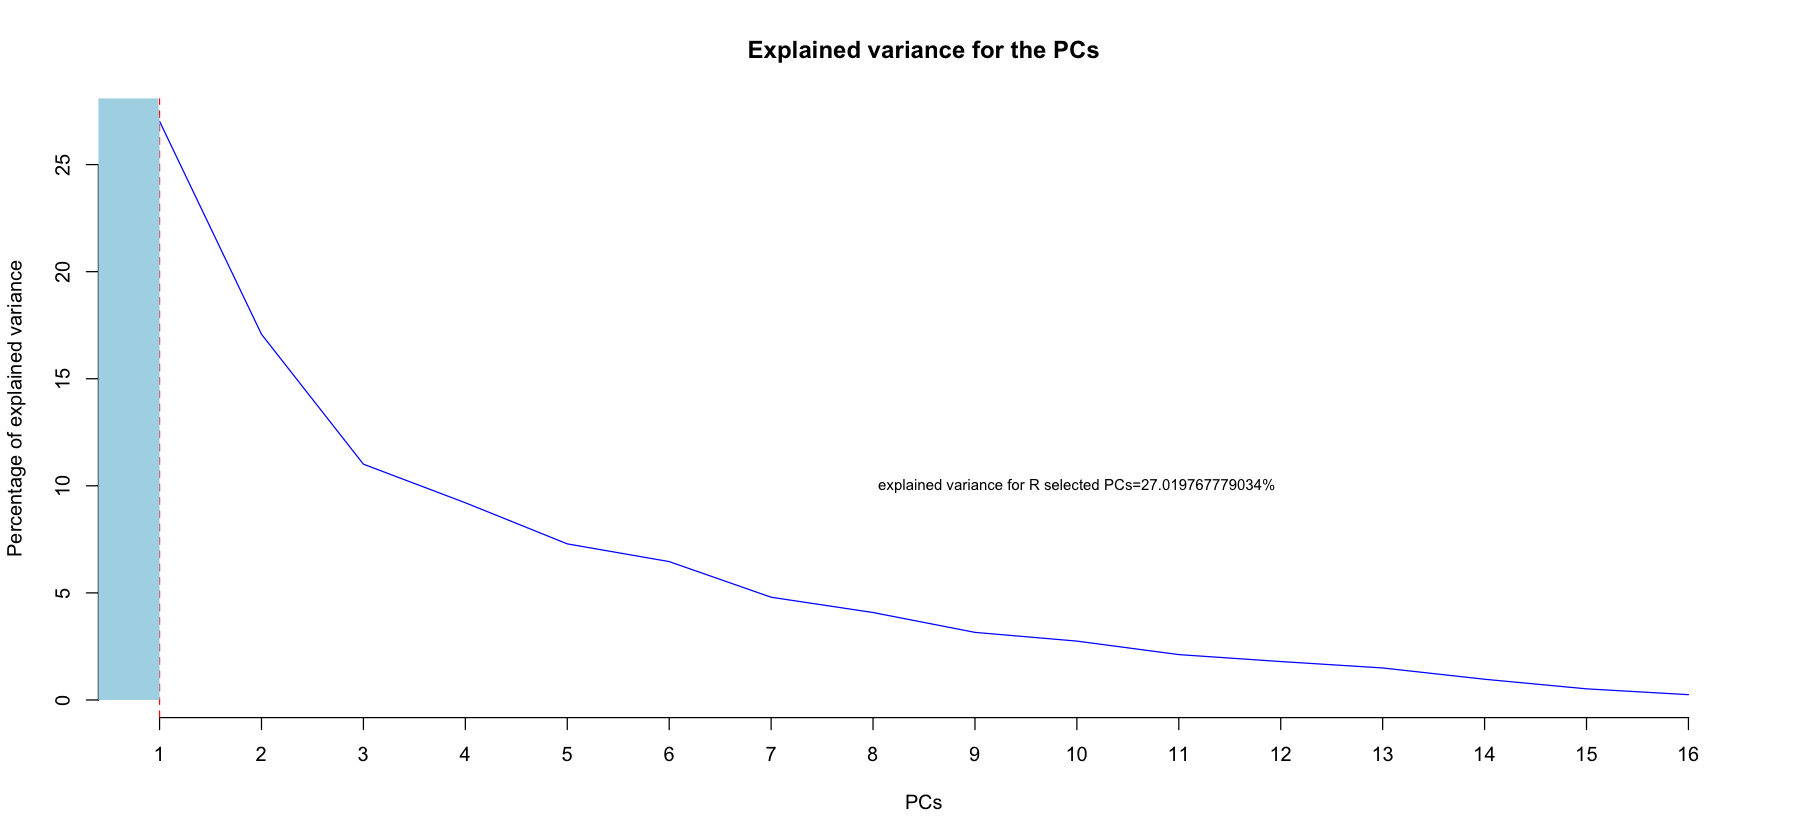

In [295]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=16)])

## plot:

plot(1:16, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:16)
axis(2)
text(x=10, y=10,cex=0.75,paste0("explained variance for R selected PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)



x2 = c(0,0,1,1)
y2 = c(0,100,explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=16)],0)
polygon(x2,y2, col="lightblue", border=NA)



Let's now  plot Plot the regression coefficients associated to the models with increasing PCs. We consider 10 components in order to have ..% deviance explained and to have a comparison with lasso.
 We look for the picks. As picks are higher as our model is better (model 1 coefficients almost 0). The model with 10 comps give us the largest amount of informations (it is the better one).
In particular we see that the price is associated to stories,aircon and bedrooms.

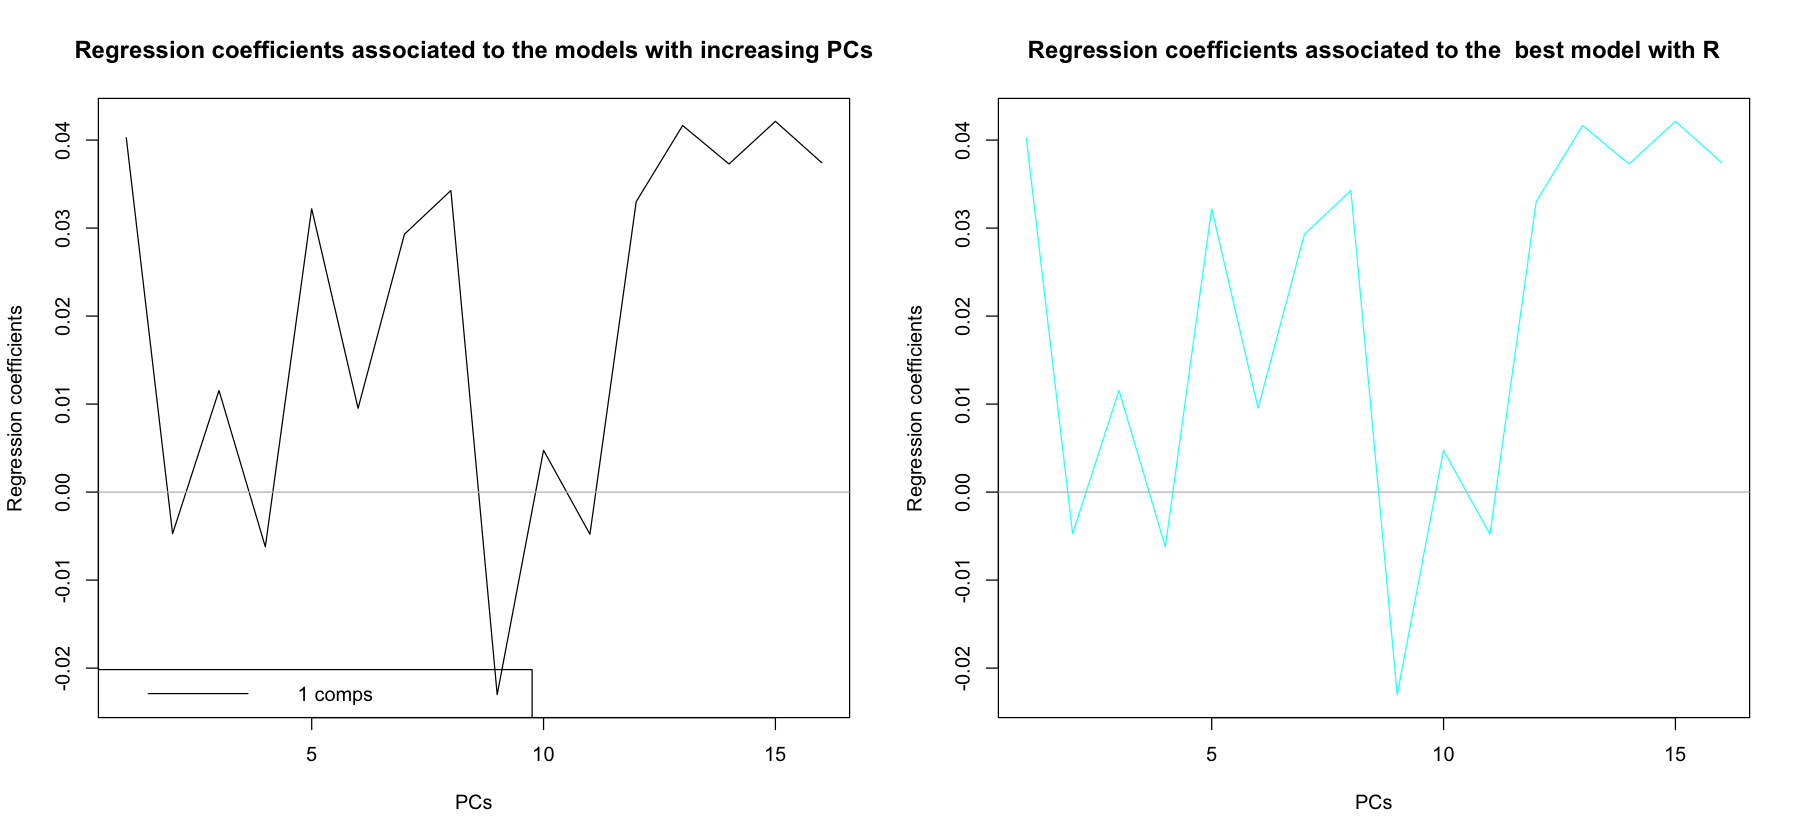

In [313]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:selectNcomp(m.pcr, method='onesigma', ncomp=16), legendpos='bottomleft', main='',
        xlab='PCs', ylab='Regression coefficients')#,xaxt="n")
#axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=1, main='', xlab='PCs', ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to the  best model with R")
#axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

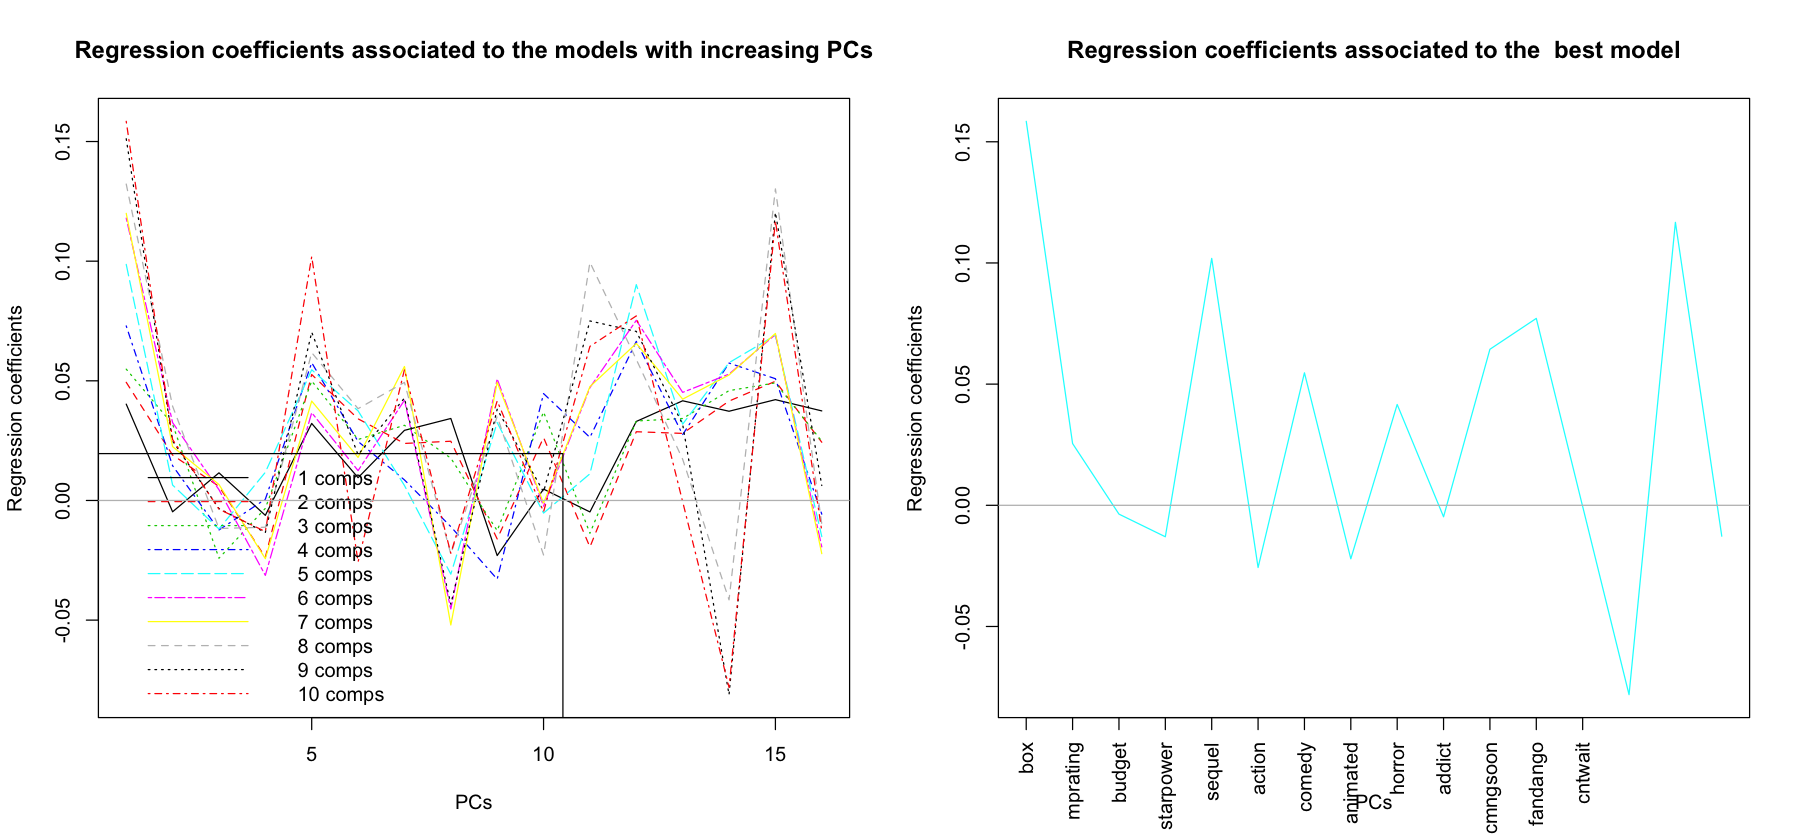

In [312]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:10, legendpos='bottomleft', main='',
        xlab='PCs', ylab='Regression coefficients')#,xaxt="n")
#axis(1, at=1:13, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=10, main='', xlab='PCs',,xaxt="n", ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to the  best model")
axis(1, at=1:13, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do see trends or anomalies in the groups. So the PCA doesn't seem so efficient for 1 PC.
For 10 PCs  We do not see trends or anomalies in the groups. So the PCA does seem satisfactory for 10 PCs.

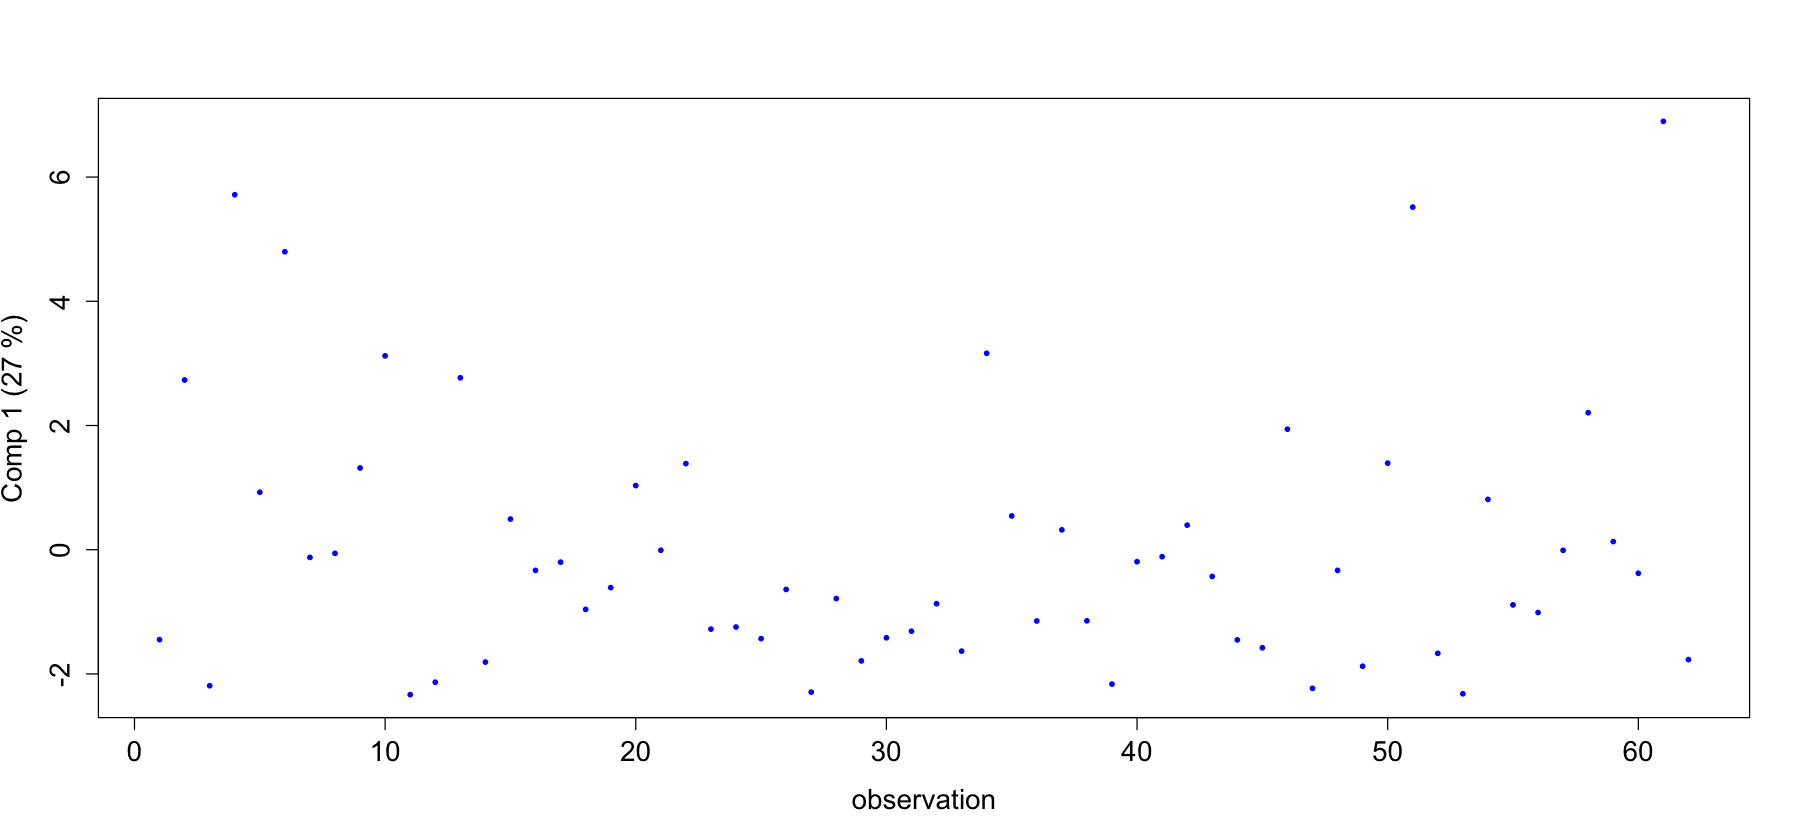

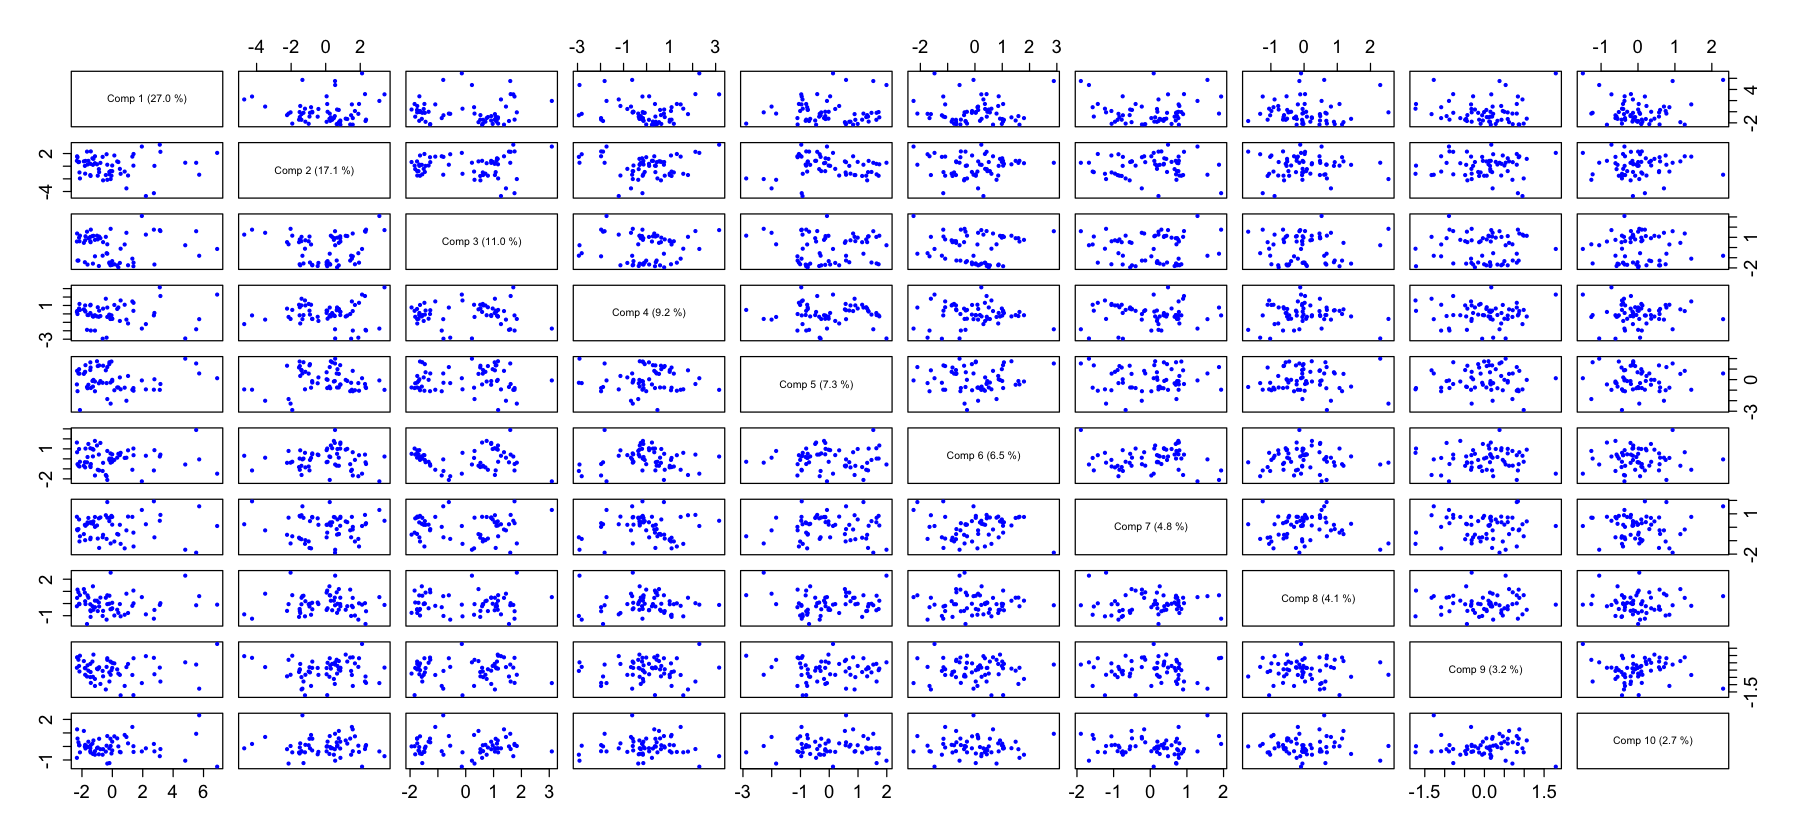

In [311]:
scoreplot(m.pcr, comps=1:selectNcomp(m.pcr, method='onesigma', ncomp=16), cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")
scoreplot(m.pcr, comps=1:10, cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")

Finally, evaluate the predictions from the model.
We see that the "fitted line" doesn't distinguish clearly the two types of clients by the way in some way it does allow to discrimen them.

(forse toglierlo).

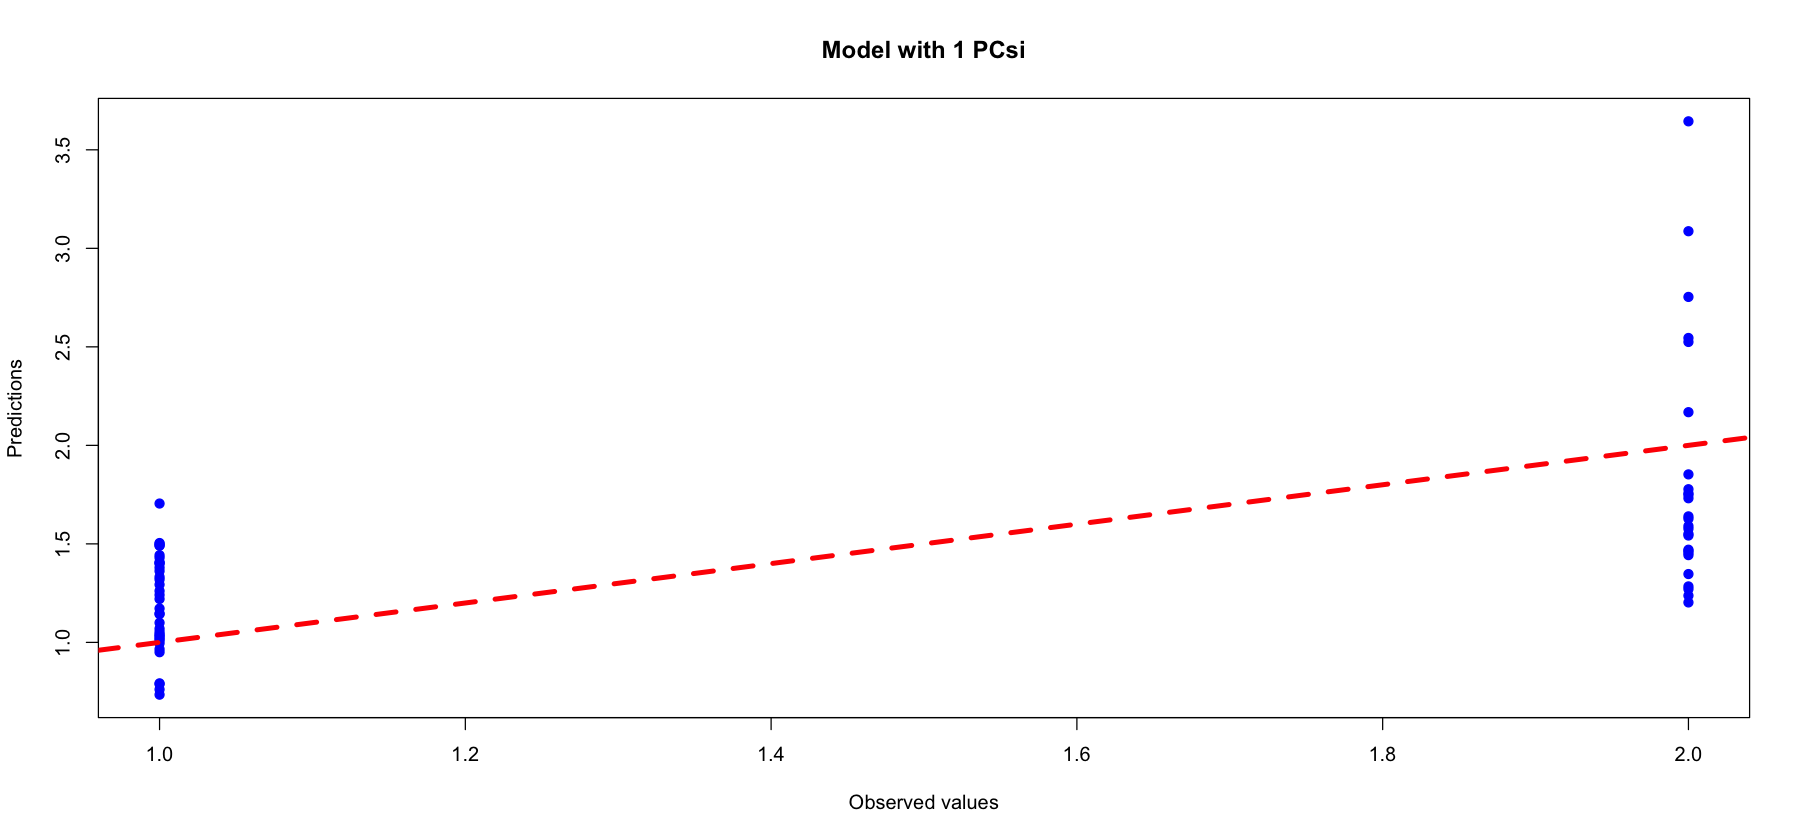

In [284]:
# plot predizione
plot(m.pcr, xlab='Observed values', ylab='Predictions',
        main='Model with 1 PCsi',col="blue",pch=19)
abline(0, 1, col="red",lt=2,lwd=4)

Let's compute MSE for 6 PCs.

In [310]:
MSEP(m.pcr, ncomp=10)

       (Intercept)  10 comps
CV          0.2515    0.1751
adjCV       0.2515    0.1740

### CONCLUSION POINT 2

Based the MSE  for the different methods are:

- 0.76 for Ridge

- 0.25 for Lasso

- 0.17 for PCA (for 10 components)

So we can say that  based in MSE  PCA is the best approach, but we keep lasso since it has got a small MSE and an higher explained deviance (99,9%). If we would obtain this deviance with PCA we would need an higher number of covariates than the 10 obtained with lasso and this would make the model more complex.